
---



---


**Trabalho de conclusão do curso Big Data e IA**

**Título:** Otimização de Modelos com técnicas de reamostragem na detecção de Fraudes em Transações Financeiras

**Autor:** Renata Cerqueira da Costa

**Orientadora:** Patrícia Rufino

-----


-----
**Nota:** A implementação dos métodos abordados neste trabalho foi feita utilizando a
linguagem de programação Python, que oferece uma vasta gama de bibliotecas adequadas
para a realização das tarefas mencionadas, como Pandas, NumPy, Matplotlib, SciPy e
Scikit-Learn. Para as análises experimentais, foi utilizado um ambiente de desenvolvimento apropriado, o Google Colab, que permite execução colaborativa e com recursos computacionais escaláveis, como GPU e TPU.

-----


-----


---



---

**Descrição & Link do Dataset:**

O conjunto de dados utilizado neste estudo consiste em transações realizadas por
portadores de cartões de crédito na Europa, especificamente no mês de setembro de 2013.

**Link:** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv



---



---



---



---

**Objetivo:**
Criar um modelo que aprenda com os padrões intrísecos dos dados e identifique se uma transação futura é fraudulenta ou legítima.

---



---

In [1]:
#Conectando o Colab ao Drive para acessar os arquivos necessarios
#from google.colab import drive
#drive.mount('/content/gdrive')
import pandas as pd

caminho_csv = "/content/sample_data/creditcard.csv"
credit = pd.read_csv(caminho_csv)
credit = pd.DataFrame(credit)
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


---


---


**Importando as Biliotecas necessárias para o projeto:**

---


---

In [2]:
# Importando as bibliotecas que serão utilizadas:

# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

# manipulação e visualização

import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import missingno as ms # para tratamento de missings
from matplotlib import cm


# tratamento nos dados
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# métricas de avaliação
from sklearn.metrics import (precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve,
                             precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report)

In [ ]:
type(credit)

pandas.core.frame.DataFrame

---


---

**Listando os tipos de variáveis do dataframe:**

---


---

In [ ]:
#O conjunto de dados tem 30 variáveis "float", 1 variável "Class" que é "integer" e que será nosso target.
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

---


---

**Observando o tamanho do dataframe:**

---


---

In [ ]:
#No registro tem 31 colunas e 284.807 registros
credit.shape

(284807, 31)

---


---

**Algumas informações importantes sobre as variáveis:**

---


---

*   Tempo  : tempo decorrido em segundos a contar da primeira transação efetuada (indexador não utilizado na análise)
*   V1-V28 : variáveis numéricas - float - que estão anonimizadas por uma transformação PCA.
*   Amount : valor da transação.
*   Class :  variável target que indica se a transação é fraudulenta ou não, sendo 0 para transações legítimas e 1 para transações com fraude.

*   o dataset não possui registros nulos e seu tamanho é de 284.807 registros e 31 colunas.



**Nota: a técnica de PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações.**

---


---

---

---
**Verificando a presença de registros nulos no dataframe:**

---

---

In [4]:
#Não há registros nulos
credit.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


----

----

**Etapa de Pré-processamento:**

Uma etapa crucial no processo de preparação dos dados é o pré-processamento
dos dados, que envolve a remoção de inconsistências, tratamento de valores ausentes e transformação dos dados em um formato adequado. Esse estágio é fundamental para melhorar a qualidade do conjunto de dados e garantir que as informações sejam precisas, permitindo identificar padrões e maximizando o desempenho do modelo. Nesta etapa, serão explorados ao máximo o potencial dos dados, extraindo insights valiosos e assegurando que os modelos sejam robustos e confiáveis.


----

----

In [ ]:
credit.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [ ]:
credit.sort_values(by='Time', ascending=True)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [ ]:
grouped_stats = credit.groupby('Class')['Amount'].describe().round(2)
# Exibir os resultados
print(grouped_stats)

          count    mean     std  min   25%    50%     75%       max
Class                                                              
0      284315.0   88.29  250.11  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.21  256.68  0.0  1.00   9.25  105.89   2125.87


---

---



**Verificando estatísticas de contagem de observações do dataset pela CLASSE:**


---

---


In [5]:
# Exibir os resultados
record_counts = credit.groupby('Class').size()
print(record_counts)

Class
0    284315
1       492
dtype: int64




Este conjunto abrange um total de 284.807 transações ocorridas em um período de dois dias, das quais 492 foram identificadas como fraudes.

---

---

----


----


**Boxplot das variáveis de entrada:**

A seguir, iremos verificar a distribuição dos dados pelo gráfico de Boxplot, identificando possíveis diferença no padrão pela variável de interesse Classe, que é representada por 0 quando a transação é legítima e 1 quando a transação é fraudulenta:

----
___

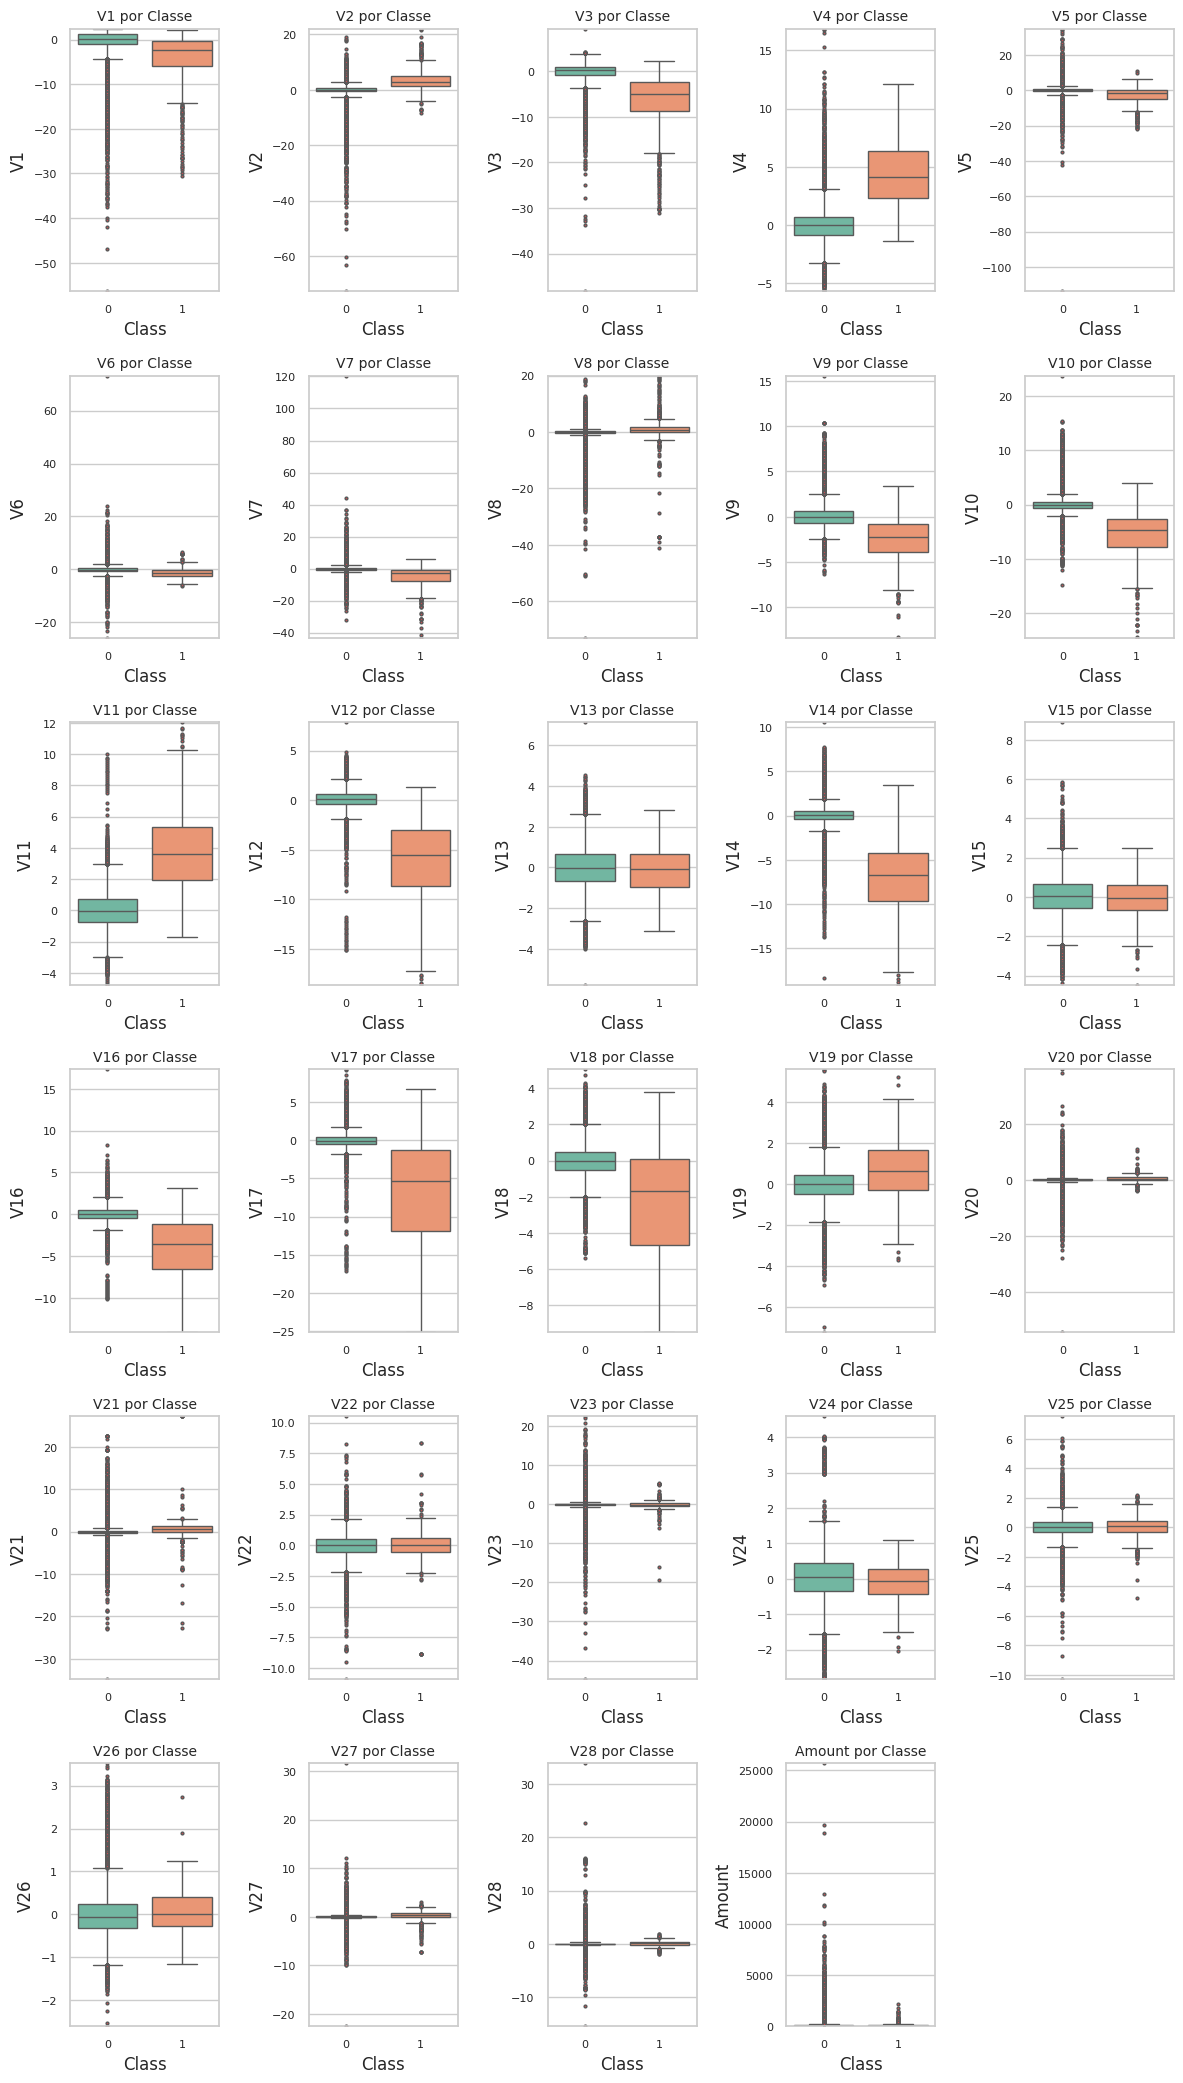

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Defina o estilo dos gráficos
sns.set(style="whitegrid")

# Lista de variáveis para os boxplots (sem 'Amount' por enquanto)
variables = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
             'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Número de subplots
n_vars = len(variables)

# Propriedades dos outliers (flierprops)
flierprops = dict(marker='o', markersize=2, linestyle='none', markerfacecolor='r')  # Reduzimos o tamanho dos outliers

# Criação de subplots (aumentei o figsize para melhorar o espaço entre os gráficos)
# Changed from 7x4 to 8x4 to accommodate 29 variables
fig, axes = plt.subplots(7, 5, figsize=(12, 24))  # Aumentei o tamanho geral
axes = axes.flatten()

# Ajustar limites dinâmicos para cada variável com base nos percentis 5 e 95
for i, var in enumerate(variables):
    # Boxplot com ajuste no tamanho dos outliers
    sns.boxplot(x='Class', y=var, data=credit, ax=axes[i], palette='Set2', flierprops=flierprops)

    # Ajuste no título para ser mais curto
    axes[i].set_title(f"{var} por Classe", fontsize=10)

    # Ajustar os limites do eixo Y dinamicamente com base nos percentis
    lower = np.nanpercentile(credit[var], 0) # Use np.nanpercentile to handle potential NaN values
    upper = np.nanpercentile(credit[var], 100) # Use np.nanpercentile to handle potential NaN values

    if not np.isnan(lower) and not np.isnan(upper): #Check to make sure the values are not NaN
        axes[i].set_ylim([lower, upper])  # Definir os limites dinamicamente para cada gráfico

    # Ajustar o tamanho dos rótulos dos eixos
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].tick_params(axis='x', labelsize=8)

# Ocultar o último subplot vazio
if len(axes) > n_vars:
    for j in range(n_vars, len(axes)):
        fig.delaxes(axes[j])

# Ajuste o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

---

---

**Padronizando a variável "Amount" que estáo com escala a diferente:**


---

---

In [3]:
from sklearn.preprocessing import StandardScaler

# Criar uma cópia do DataFrame original
credit_padronizados = credit.copy()

# Padronizar apenas a variável 'Amount'
scaler = StandardScaler()
credit_padronizados['Amount'] = scaler.fit_transform(credit[['Amount']])

# Verificar as primeiras linhas do DataFrame padronizado
print(credit_padronizados.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
saida = credit_padronizados.describe().round(2)
print(saida)

           Time        V1        V2        V3        V4        V5        V6  \
count  63472.00  63472.00  63472.00  63472.00  63472.00  63472.00  63472.00   
mean   32876.37     -0.24     -0.01      0.69      0.17     -0.27      0.10   
std    13937.62      1.86      1.66      1.43      1.38      1.39      1.31   
min        0.00    -56.41    -72.72    -32.97     -5.17    -42.15    -26.16   
25%    27310.75     -1.00     -0.59      0.20     -0.72     -0.88     -0.64   
50%    36494.50     -0.24      0.07      0.78      0.19     -0.30     -0.15   
75%    43273.25      1.15      0.73      1.41      1.05      0.27      0.49   
max    50731.00      1.96     18.18      4.10     16.72     34.80     22.53   

             V7        V8        V9  ...       V21       V22       V23  \
count  63472.00  63472.00  63472.00  ...  63471.00  63471.00  63471.00   
mean      -0.11      0.06      0.05  ...     -0.03     -0.11     -0.04   
std        1.25      1.19      1.17  ...      0.72      0.64      

In [ ]:
saida.to_csv("credit_padronizados.csv", index=False)

---

---


**Nesta etapa vamos verificar os dados que estão fora do intervalo IQR no conjunto de dados:**


---

---

In [20]:
#Vamos verificar nesta etapa o outliers, verificando pela medida interquartil

# Lista de variáveis para análise
variables = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
             'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Função para identificar outliers usando o método IQR
def identificar_outliers_por_iqr(df, col):
    outliers = [] # Use a list to store outlier DataFrames
    for c in col:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        # Append the DataFrame of outliers for the current column to the list
        outliers.append(df[(df[c] < limite_inferior) | (df[c] > limite_superior)])
    # Concatenate all outlier DataFrames into a single DataFrame
    return pd.concat(outliers).drop_duplicates()

# Identificar outliers
outliers_iqr = identificar_outliers_por_iqr(credit_padronizados, variables)

# Contar os outliers pela variável alvo Class
outliers_por_class = outliers_iqr['Class'].value_counts()
print(outliers_por_class)


Class
0.0    33660
1.0      159
Name: count, dtype: int64


---

---


**Contagem de outliers:**

O resultado mostra a contagem de outliers para a classe minoritária e majoritária. Contudo a exclusão resultaria em falta de representatitivade para conituidade do estudo, então optou-se por não excluir.


---

---

---

---


**Distribuição dos dados para a variável Amount.**


---

---

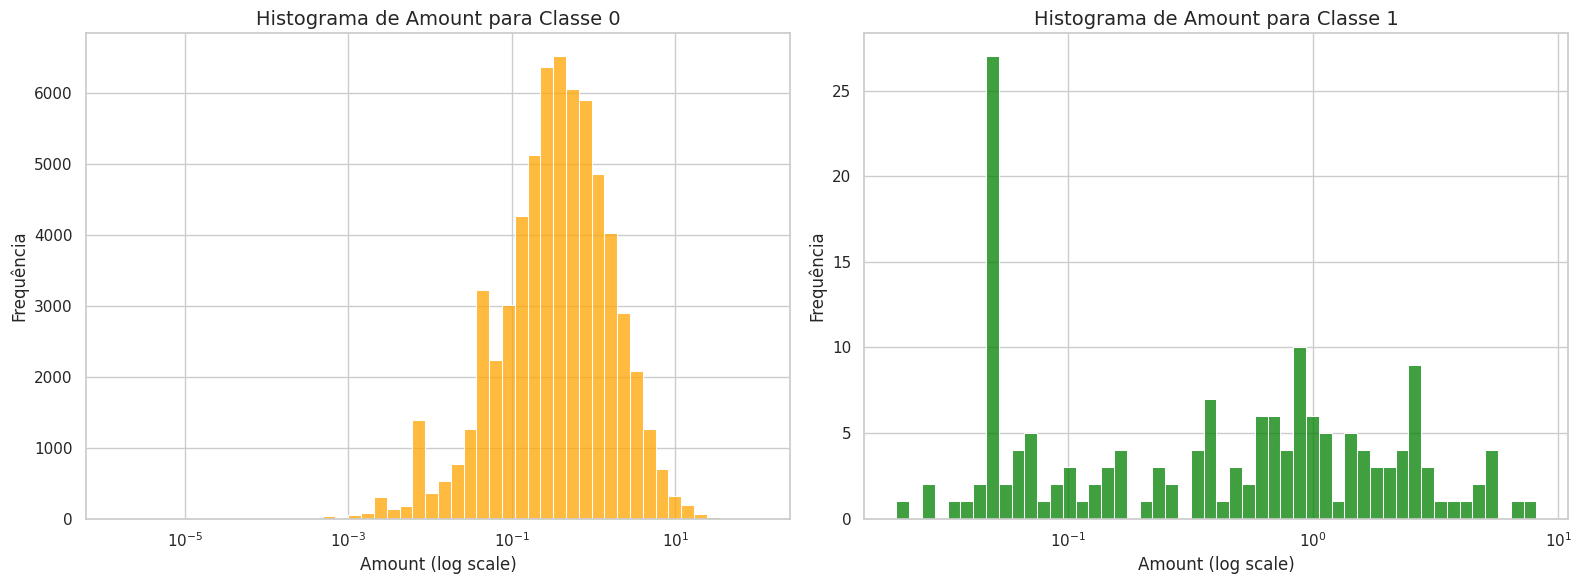

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Filtrar os dados para as classes 0 (transações legítimas) e 1 (fraudulentas)
classe_0 = credit_padronizados[credit_padronizados['Class'] == 0]
classe_1 = credit_padronizados[credit_padronizados['Class'] == 1]

# Criar a figura com dois subplots (lado a lado)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para a classe 0 (transações legítimas) com cor laranja
sns.histplot(data=classe_0, x='Amount', color='#FFA500', bins=50, element="bars", ax=axes[0], log_scale=(True, False))
axes[0].set_title('Histograma de Amount para Classe 0', fontsize=14)
axes[0].set_xlabel('Amount (log scale)', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Histograma para a classe 1 (transações fraudulentas) com cor laranja
sns.histplot(data=classe_1, x='Amount', color='green', bins=50, element="bars", ax=axes[1], log_scale=(True, False))
axes[1].set_title('Histograma de Amount para Classe 1', fontsize=14)
axes[1].set_xlabel('Amount (log scale)', fontsize=12)
axes[1].set_ylabel('Frequência', fontsize=12)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

---

---

**Nota:**


Observamos pelo histograma da variável Amount que os valores da Classe 1 (fraude) estão mais dispersos e concentrados em valores menor de transações. Além disso, como evidenciado no resumo descritvo, por não ter sido transformada pelo PCA, esta variável apresenta uma escala diferente das demais variáveis. Portanto, foi necessário padronizá-la.

---

---

**Importando bibliotecas necessárias para aplicar o Método Holdout:**

---

---

In [4]:
# machine learning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Import the train_test_split function
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# métricas de avaliação
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, balanced_accuracy_score

# Reamostragem dos dados
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

---

---

**No passo abaixo, iremos dividir a amostra em treinamento e teste, antes de aplicar os métodos para balancear os dados:**

---

---

In [5]:
# Dividir o DataFrame 'Credit' em conjuntos de treinamento e teste (70% treinamento, 30% teste)

X = credit_padronizados.drop(['Class','Time'], axis=1)
y = credit_padronizados['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )

# Exibir as informações sobre os tamanhos dos conjuntos de treinamento e teste
print(f"Tamanho do conjunto de treinamento (X): {len(X_train)} amostras")
print(f"Tamanho do conjunto de teste (X): {len(X_test)} amostras")
print(f"Tamanho do conjunto de treinamento (Y): {len(y_train)} amostras")
print(f"Tamanho do conjunto de teste (Y): {len(y_test)} amostras")

Tamanho do conjunto de treinamento (X): 199364 amostras
Tamanho do conjunto de teste (X): 85443 amostras
Tamanho do conjunto de treinamento (Y): 199364 amostras
Tamanho do conjunto de teste (Y): 85443 amostras


---

---

**Etapa de Modelagem:**


Na detecção de fraudes em transações com cartões de crédito, as técnicas de classificação de dados desempenham um papel essencial na identificação de padrões fora do comum e na prevenção de atividades fraudulentas.  Vamos ajustar inicialmente os modelos iniciais sem balanceamento no conjunto de dados utilizando os hiperparâmetros defalult da biblioteca Scikit-Learn. As técnicas que serão usadas para essa finalidade: a Regressão Logística e a Floresta Aleatória.

---

---

---

---
**Classificador Floresta Aleatória:**

Ajustando os dados através do classificador Floresta Aleatória com parâmetros default da biblioteca Scikit-Learn.

---

---

Acurácia: 0.9996
Acurácia Balanceada: 0.9007
Precisão: 0.9316
Revocação: 0.8015
F1 Score: 0.8617
ROC AUC: 0.9583
PR AUC: 0.8724

Matriz de Confusão:
 [[85299     8]
 [   27   109]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.80      0.86       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



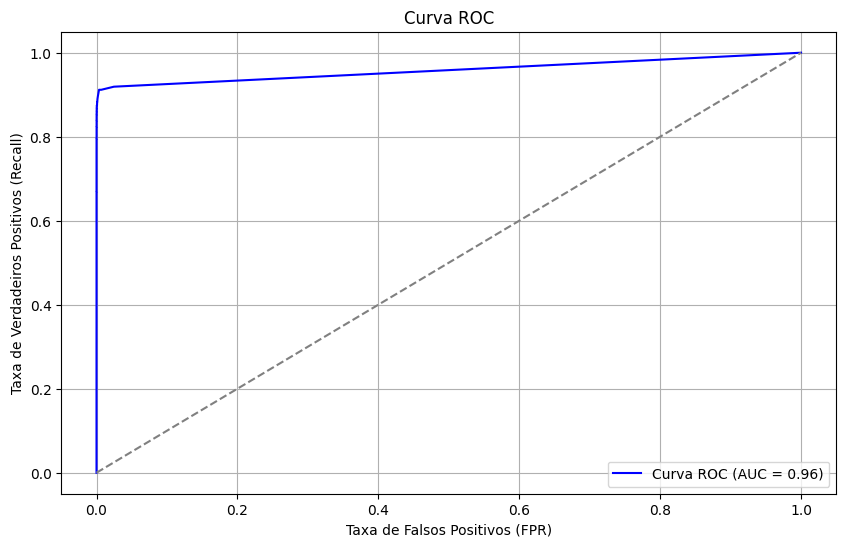

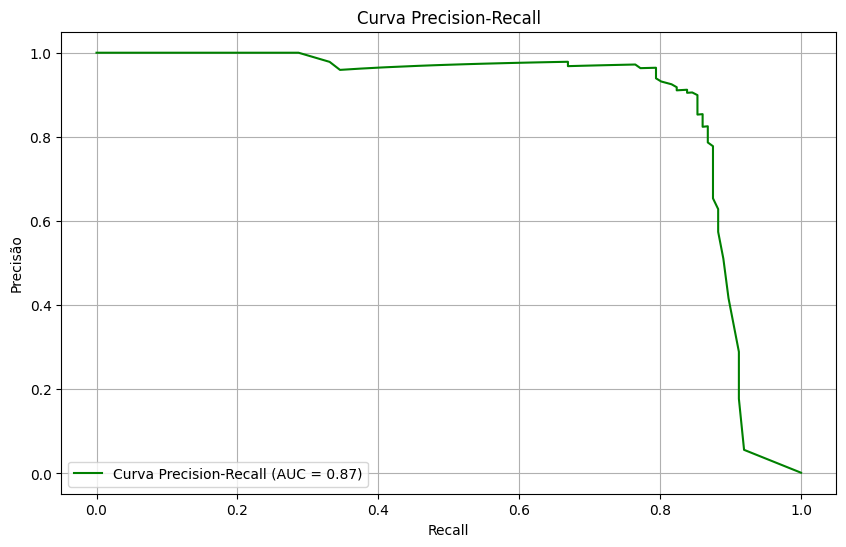

In [10]:
# Ajustar o modelo de Random Forest Default
model_rf = RandomForestClassifier(random_state=23)  # controla a aleatoriedade dos conjuntos de dados e das features
model_rf.fit(X_train, y_train)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()



---

---
**Classificador Regressão Logística:**

Ajustando os dados através do classificador Regressão Logística com parâmetros default da biblioteca Scikit-Learn.



---


---


Acurácia: 0.9993
Acurácia Balanceada: 0.8198
Precisão: 0.8700
Revocação: 0.6397
F1 Score: 0.7373
ROC AUC: 0.9812
PR AUC: 0.7914

Matriz de Confusão:
 [[85294    13]
 [   49    87]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.64      0.74       136

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



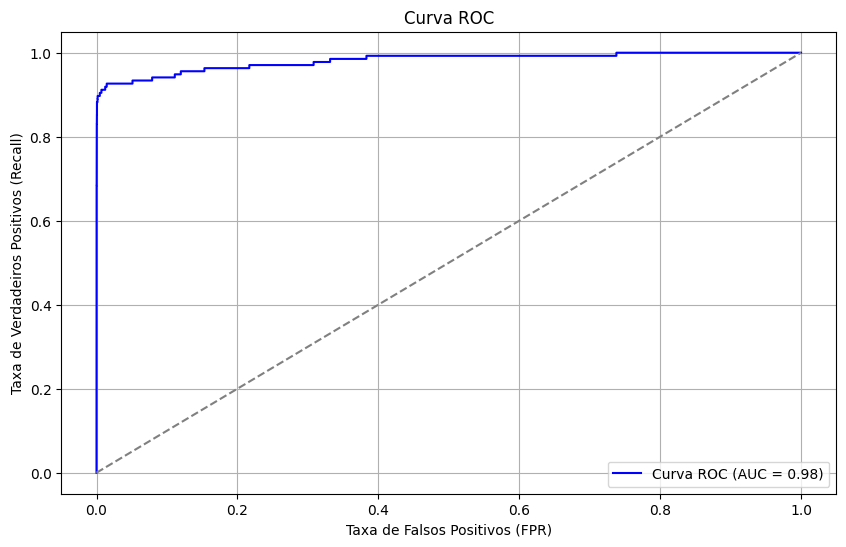

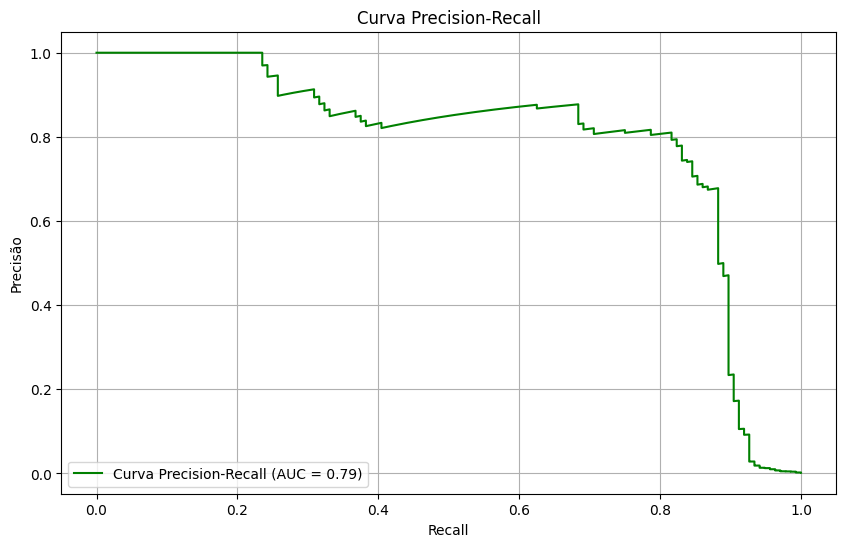

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ajustar o modelo de Regressão Logística Default
model_lr = LogisticRegression(penalty='l2', max_iter=100, solver='lbfgs')
model_lr.fit(X_train, y_train)

# Preditos
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)


# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()



---

---

**Técnica de balanceamento SMOTE + Classificador Floresta Aleatória:**


A partir de agora, aplicaremos técnicas de balanceamento variando seus hiperparâmetros, e após isso, ajustaremos novamente os classificadores.



---

----

**Técnica de Balanceamento SMOTE (sampling_strategy=auto | k_neighbors=5) com Floresta Aleatória:**

Nota: essa configuração SMOTE é o padrão da biblioteca Scikit Learn.

---

---

Acurácia: 0.9996
Acurácia Balanceada: 0.9411
Precisão: 0.8511
Revocação: 0.8824
F1 Score: 0.8664
ROC AUC: 0.9801
PR AUC: 0.8868

Matriz de Confusão:
 [[85286    21]
 [   16   120]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.88      0.87       136

    accuracy                           1.00     85443
   macro avg       0.93      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



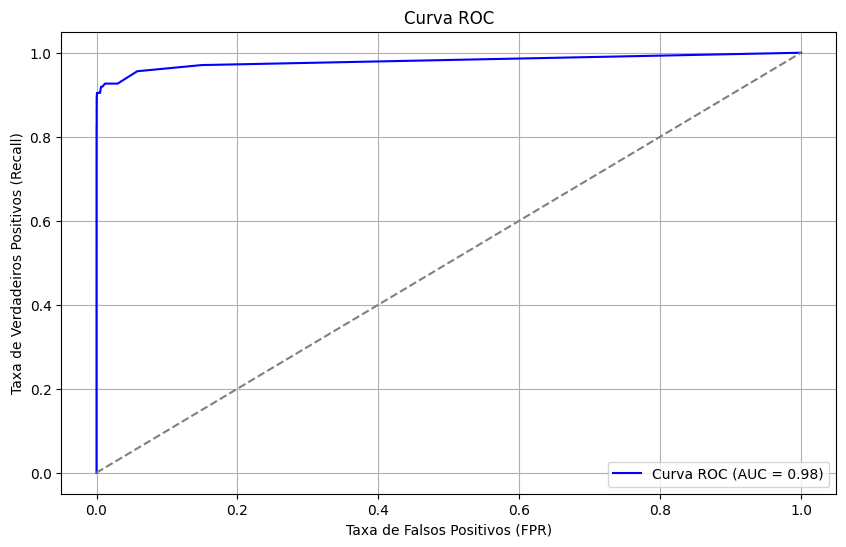

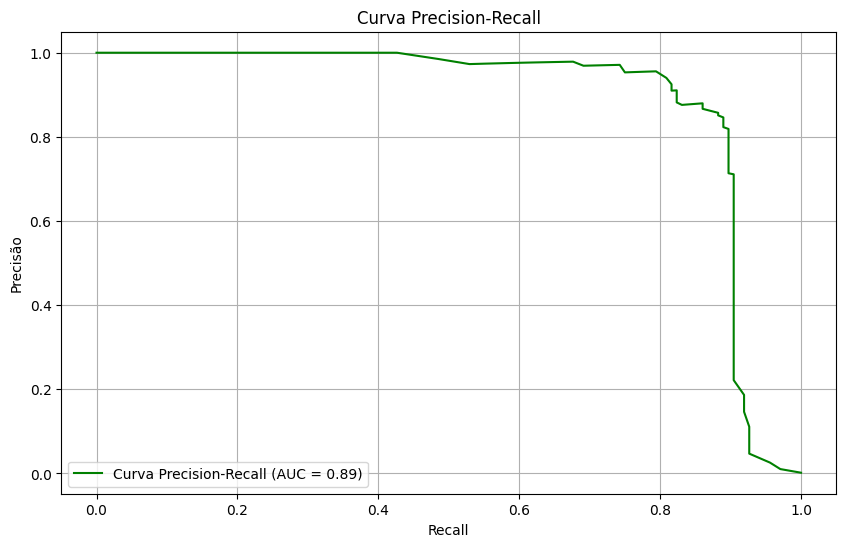

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----


**Técnica de Balanceamento SMOTE (sampling_strategy=0.5 | k_neighbors=5) com Floresta Aleatória:**


-----------

-----

Acurácia: 0.9995
Acurácia Balanceada: 0.9374
Precisão: 0.8380
Revocação: 0.8750
F1 Score: 0.8561
ROC AUC: 0.9851
PR AUC: 0.8911

Matriz de Confusão:
 [[85284    23]
 [   17   119]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.88      0.86       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



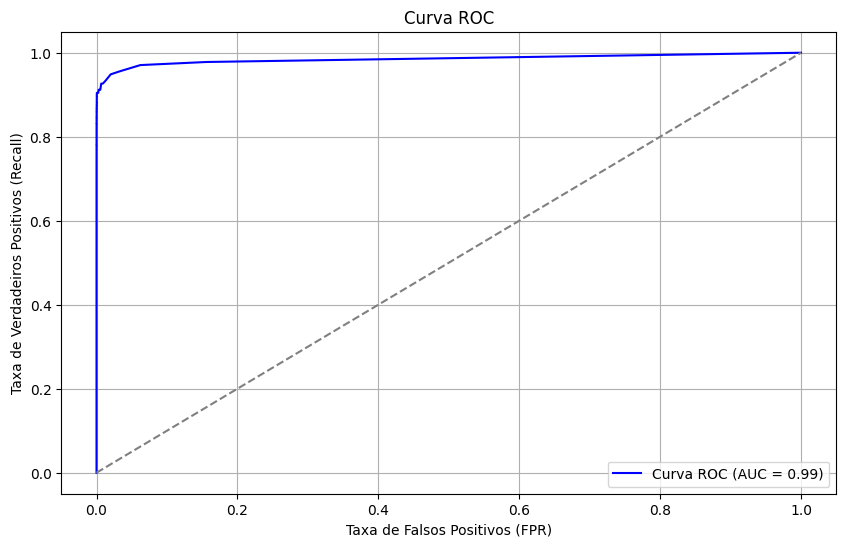

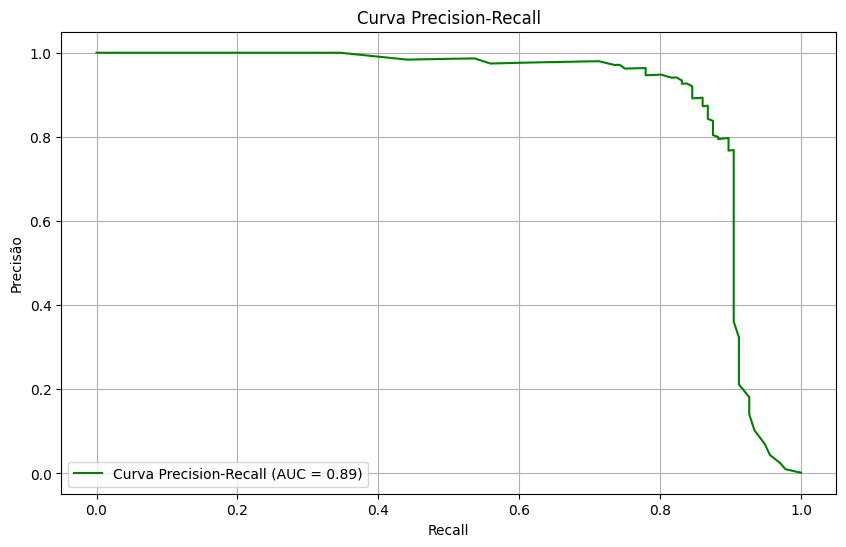

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5, sampling_strategy=0.5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento SMOTE (sampling_strategy=0,5 | k_neighbors=10) com Floresta Aleatória:**

-----------

-----

Acurácia: 0.9995
Acurácia Balanceada: 0.9447
Precisão: 0.8288
Revocação: 0.8897
F1 Score: 0.8582
ROC AUC: 0.9836
PR AUC: 0.8896

Matriz de Confusão:
 [[85282    25]
 [   15   121]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.89      0.86       136

    accuracy                           1.00     85443
   macro avg       0.91      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



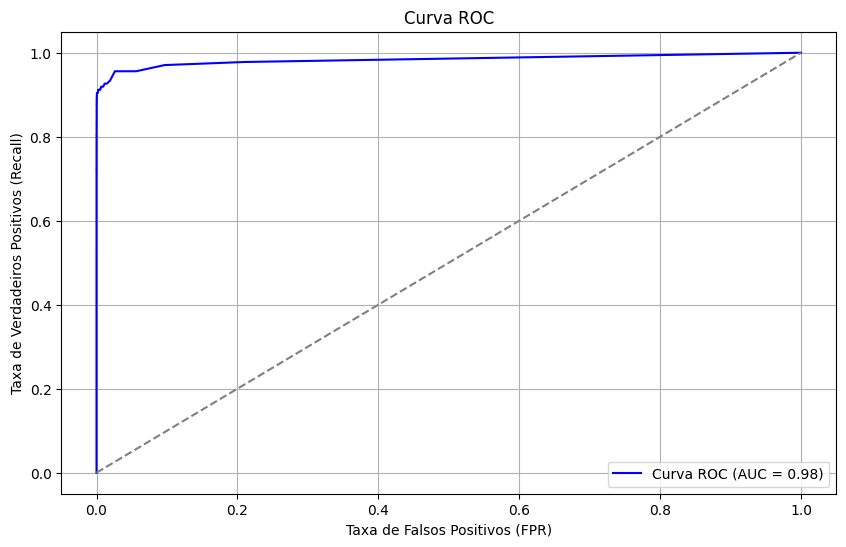

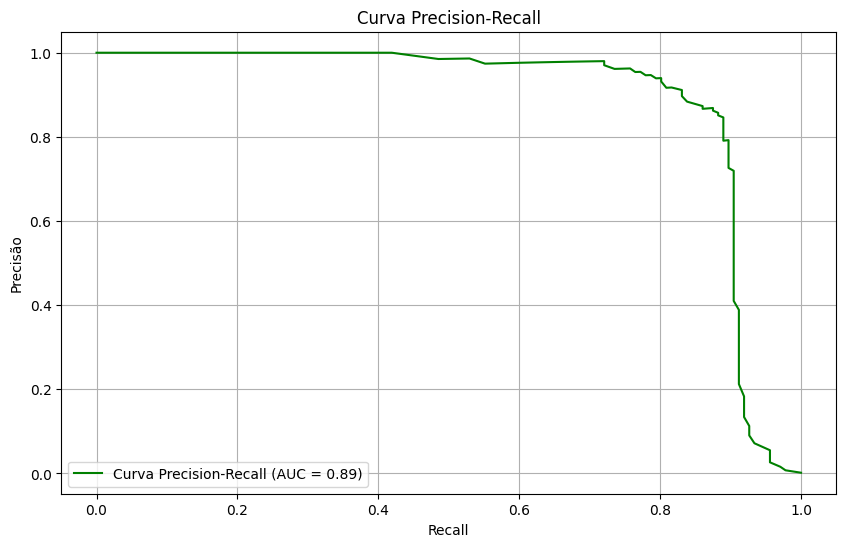

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy=0.5, k_neighbors=10, n_jobs=-1)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


-----------

-----

**Técnica de Balanceamento SMOTE  (sampling_strategy=auto | k_neighbors=10) com Floresta Aleatória:**

-----------

-----

Acurácia: 0.9995
Acurácia Balanceada: 0.9447
Precisão: 0.8176
Revocação: 0.8897
F1 Score: 0.8521
ROC AUC: 0.9879
PR AUC: 0.8876

Matriz de Confusão:
 [[85280    27]
 [   15   121]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.89      0.85       136

    accuracy                           1.00     85443
   macro avg       0.91      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



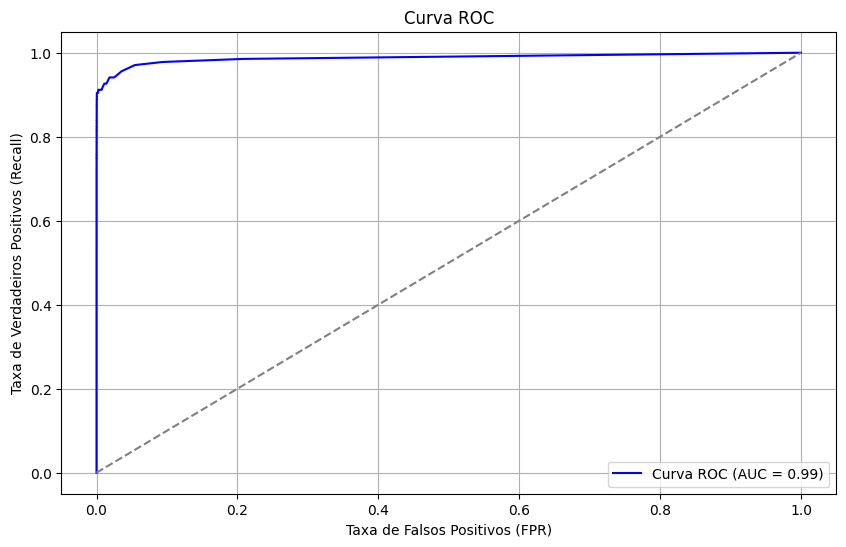

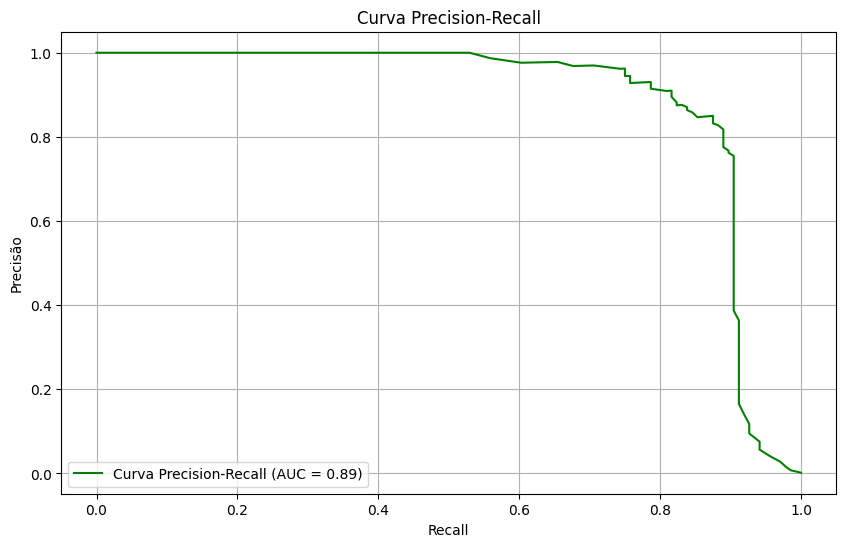

In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=10, n_jobs=-1)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------


---

**Técnica de Balanceamento SMOTE (sampling_strategy=auto | k_neighbors=5) com Regressão Logística**

Nota: essa configuração SMOTE é o default da biblioteca Scikit Learn.

-----------

-----

Acurácia: 0.9729
Acurácia Balanceada: 0.9497
Precisão: 0.0517
Revocação: 0.9265
F1 Score: 0.0980
ROC AUC: 0.9824
PR AUC: 0.7959

Matriz de Confusão:
 [[82998  2309]
 [   10   126]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



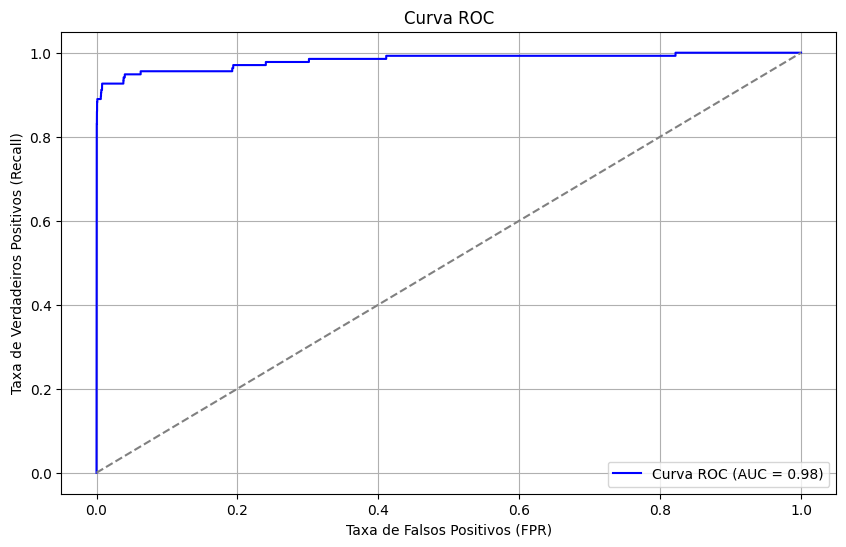

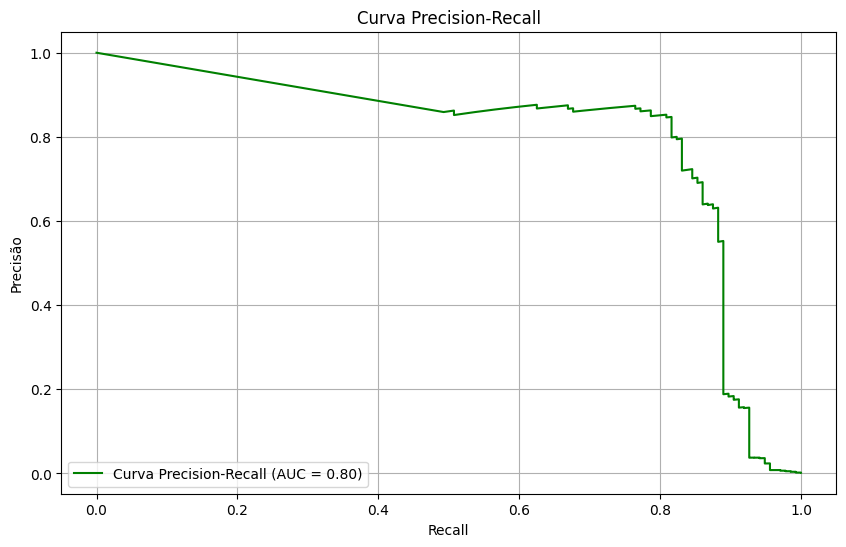

In [78]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23)

# Aplicar o SMOTE apenas nos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo SMOTE
model_lr = LogisticRegression(random_state=23, max_iter=100, penalty='l2', solver='lbfgs', class_weight=None)
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


-----------

-----

**Técnica de Balanceamento SMOTE  (sampling_strategy = 0.5 | k = 5) com Regressão Logística:**

-----------

-----

Acurácia: 0.9880
Acurácia Balanceada: 0.9573
Precisão: 0.1102
Revocação: 0.9265
F1 Score: 0.1970
ROC AUC: 0.9824
PR AUC: 0.7874

Matriz de Confusão:
 [[84290  1017]
 [   10   126]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.11      0.93      0.20       136

    accuracy                           0.99     85443
   macro avg       0.56      0.96      0.60     85443
weighted avg       1.00      0.99      0.99     85443



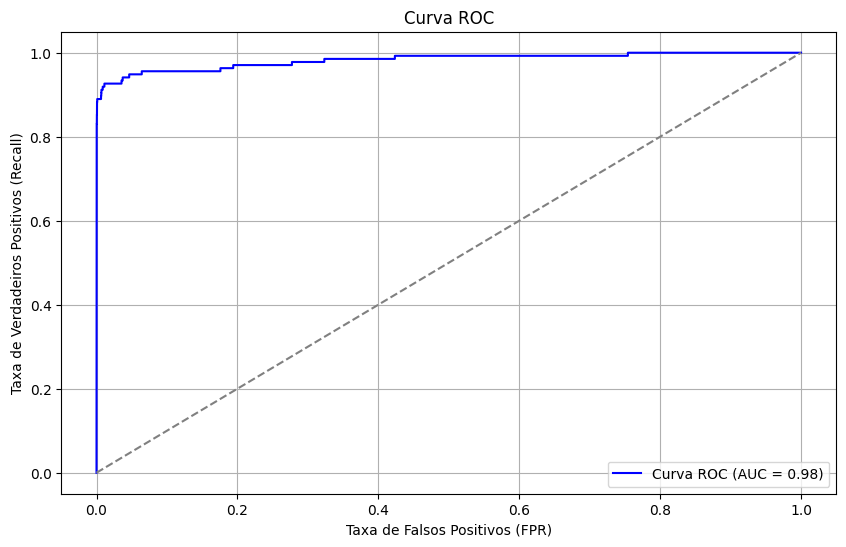

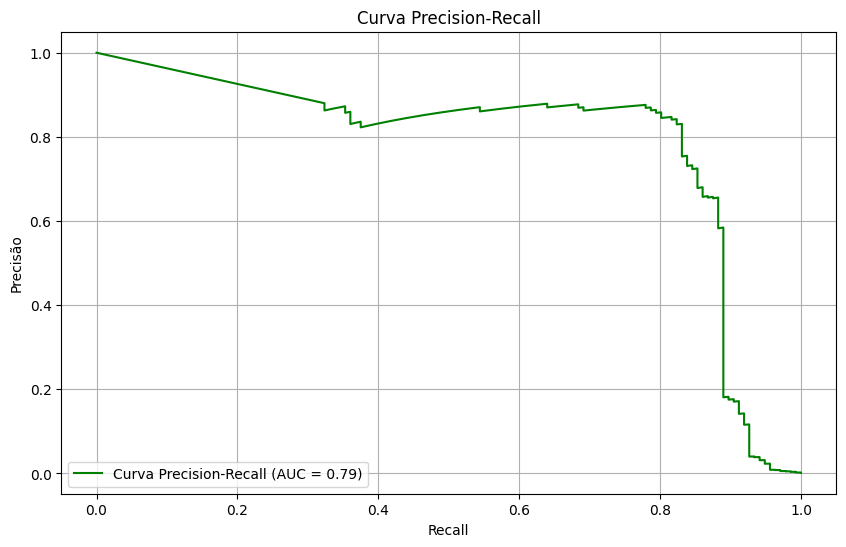

In [79]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5)

# Aplicar o SMOTE apenas nos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo SMOTE
model_lr = LogisticRegression(random_state=23, max_iter=100, penalty='l2', solver='lbfgs', class_weight=None)
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento SMOTE  (sampling_strategy = 0.5 | k_neighbors = 10) com Regressão Logística:**

-----------

-----

Acurácia: 0.9876
Acurácia Balanceada: 0.9534
Precisão: 0.1066
Revocação: 0.9191
F1 Score: 0.1910
ROC AUC: 0.9820
PR AUC: 0.7842

Matriz de Confusão:
 [[84259  1048]
 [   11   125]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.11      0.92      0.19       136

    accuracy                           0.99     85443
   macro avg       0.55      0.95      0.59     85443
weighted avg       1.00      0.99      0.99     85443



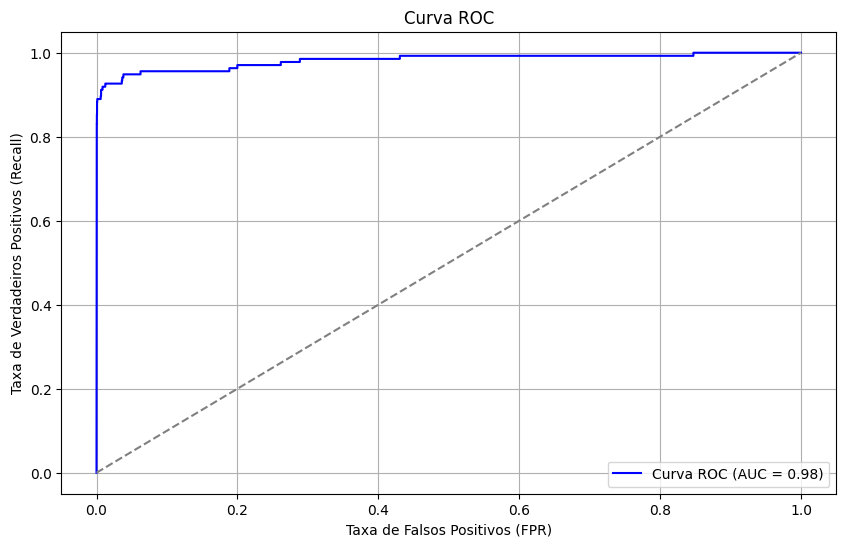

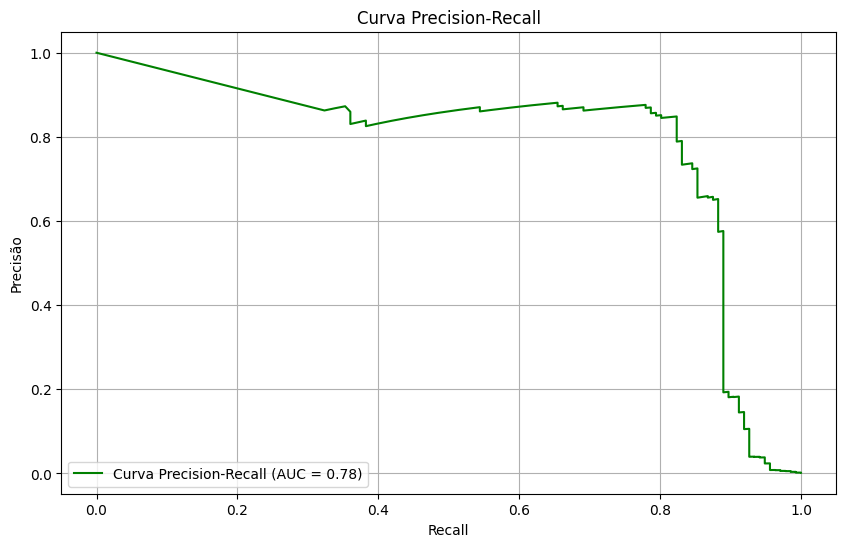

In [72]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE apenas nos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo SMOTE
model_lr = LogisticRegression(max_iter=100, penalty='l2', solver='lbfgs', class_weight=None)
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento ADASYN (sampling_strategy=auto | n_neighbors=5) com Floresta Aleatória:**

Nota: essa configuração ADASYN é o default da biblioteca Scikit Learn.

-----------

-----

Acurácia: 0.9995
Acurácia Balanceada: 0.9300
Precisão: 0.8417
Revocação: 0.8603
F1 Score: 0.8509
ROC AUC: 0.9841
PR AUC: 0.8822

Matriz de Confusão:
 [[85285    22]
 [   19   117]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.86      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



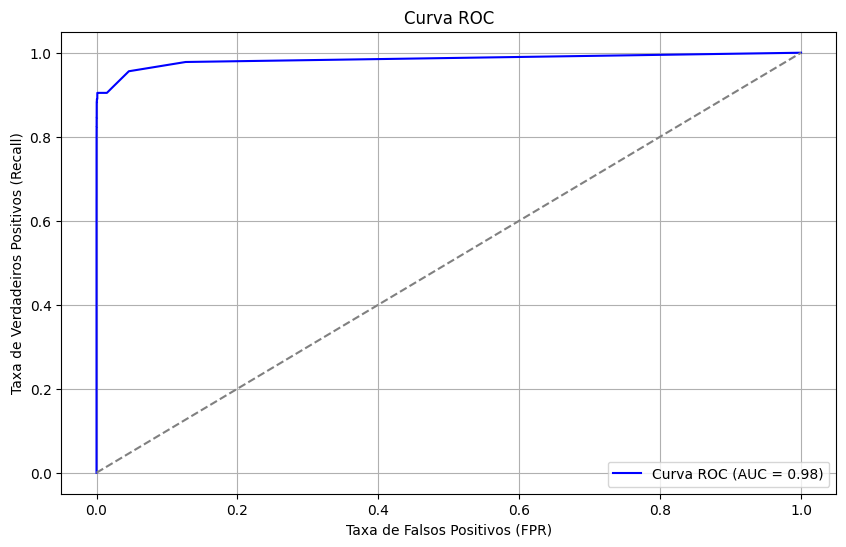

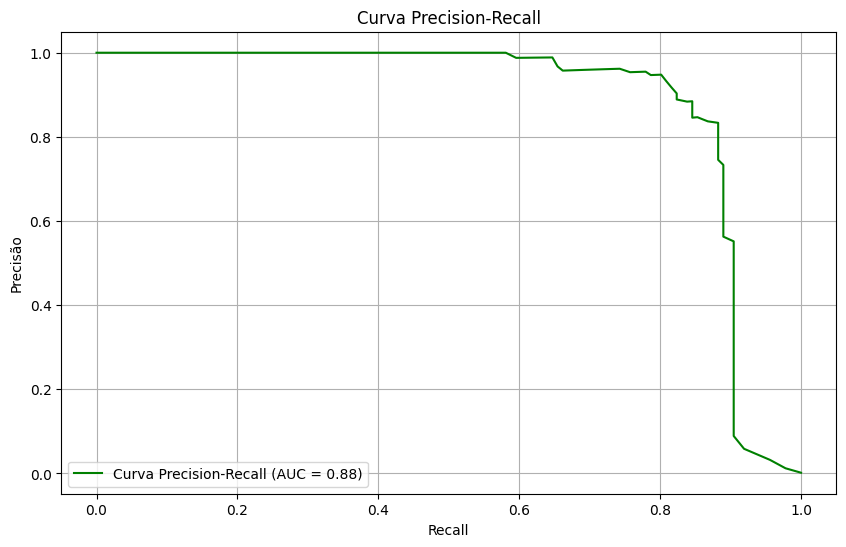

In [73]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento ADASYN (sampling_strategy = 0.5 | n_neighbors = 5) com Floresta Aleatória:**

-----------

-----

Acurácia: 0.9995
Acurácia Balanceada: 0.9263
Precisão: 0.8286
Revocação: 0.8529
F1 Score: 0.8406
ROC AUC: 0.9805
PR AUC: 0.8810

Matriz de Confusão:
 [[85283    24]
 [   20   116]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.85      0.84       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



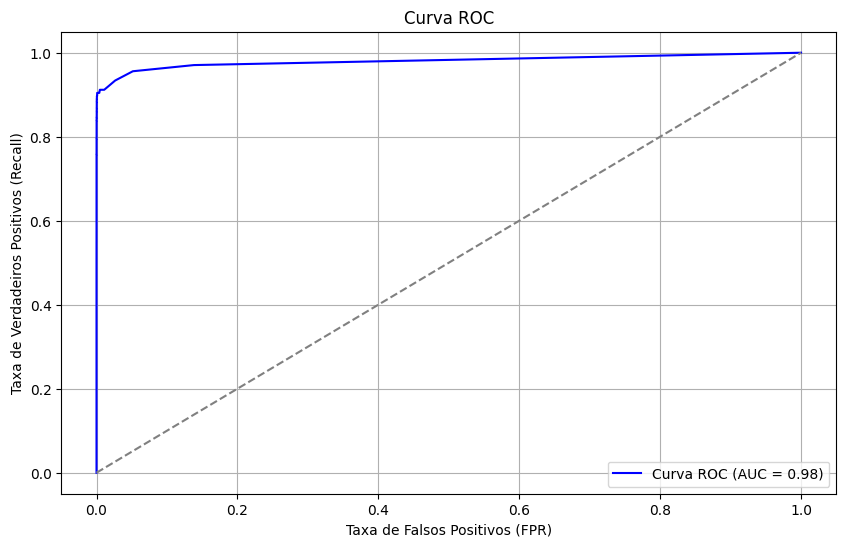

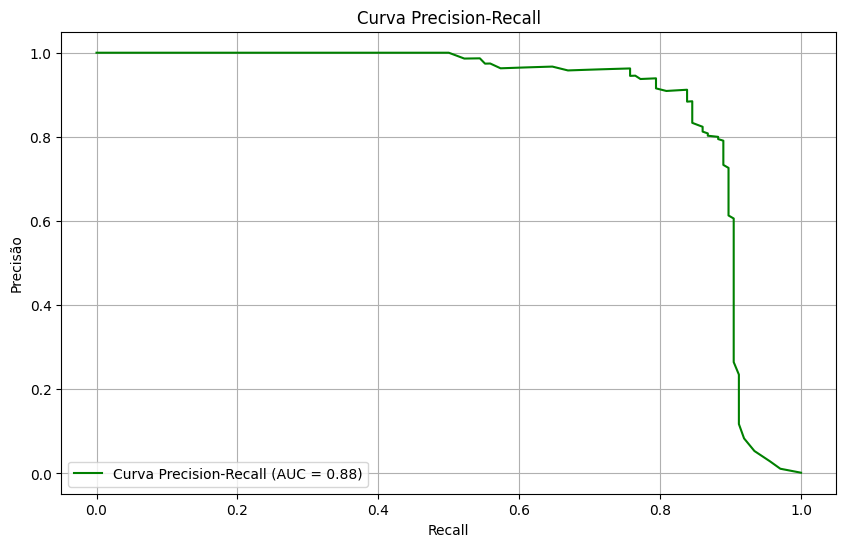

In [74]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento ADASYN (sampling_strategy = 0.5 | n_neighbors = 10) com Floresta Aleatória:**

-----------

-----

Acurácia: 0.9994
Acurácia Balanceada: 0.9300
Precisão: 0.8014
Revocação: 0.8603
F1 Score: 0.8298
ROC AUC: 0.9908
PR AUC: 0.8839

Matriz de Confusão:
 [[85278    29]
 [   19   117]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.80      0.86      0.83       136

    accuracy                           1.00     85443
   macro avg       0.90      0.93      0.91     85443
weighted avg       1.00      1.00      1.00     85443



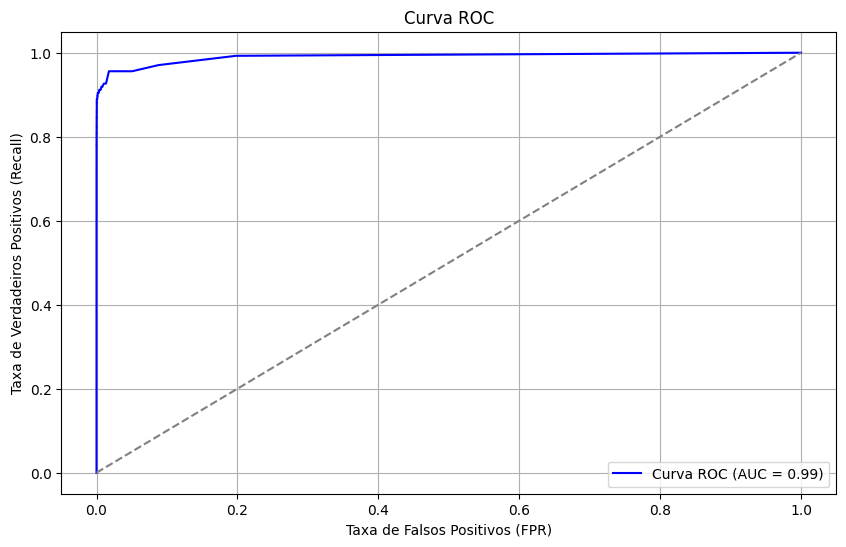

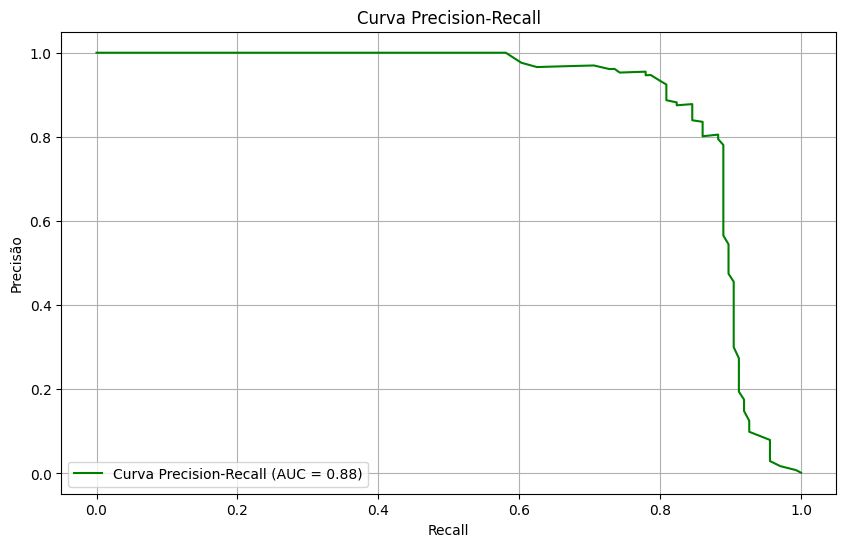

In [75]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento ADASYN (sampling_strategy=auto | n_neighbors=5) com Regressão Logística:**

Nota: essa configuração ADASYN é o default da biblioteca Scikit Learn.


-----------

-----

Acurácia: 0.9058
Acurácia Balanceada: 0.9308
Precisão: 0.0159
Revocação: 0.9559
F1 Score: 0.0313
ROC AUC: 0.9815
PR AUC: 0.8115

Matriz de Confusão:
 [[77266  8041]
 [    6   130]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     85307
           1       0.02      0.96      0.03       136

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443



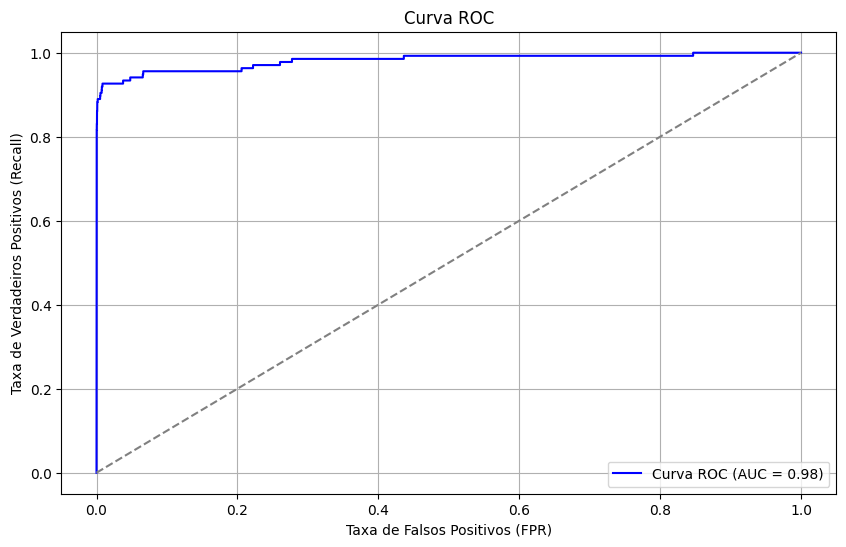

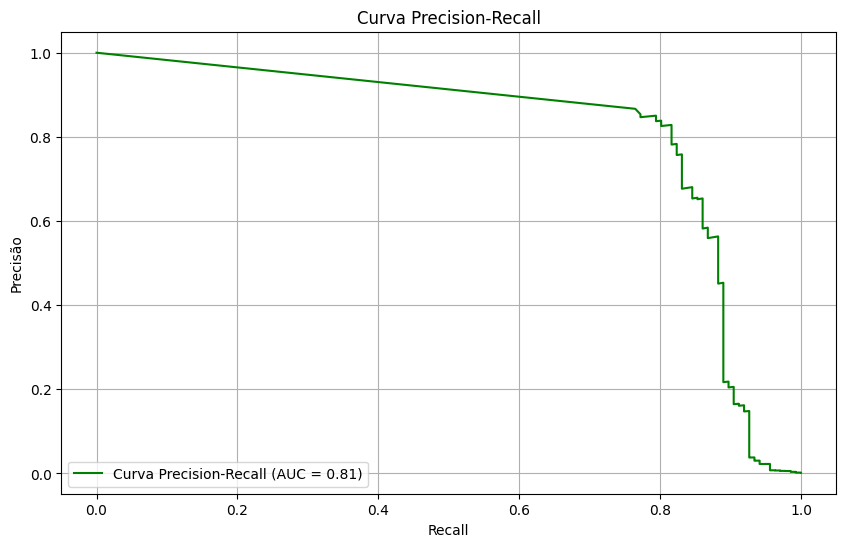

In [18]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23)

# Aplicar o ADASYN apenas nos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo ADASYN
model_lr = LogisticRegression()
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()



-----------

-----

**Técnica de Balanceamento ADASYN (sampling_strategy = 0.5 | n_neighbors=5 ) com Regressão Logística:**

-----------

-----

Acurácia: 0.9494
Acurácia Balanceada: 0.9490
Precisão: 0.0290
Revocação: 0.9485
F1 Score: 0.0563
ROC AUC: 0.9821
PR AUC: 0.8054

Matriz de Confusão:
 [[80991  4316]
 [    7   129]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     85307
           1       0.03      0.95      0.06       136

    accuracy                           0.95     85443
   macro avg       0.51      0.95      0.52     85443
weighted avg       1.00      0.95      0.97     85443



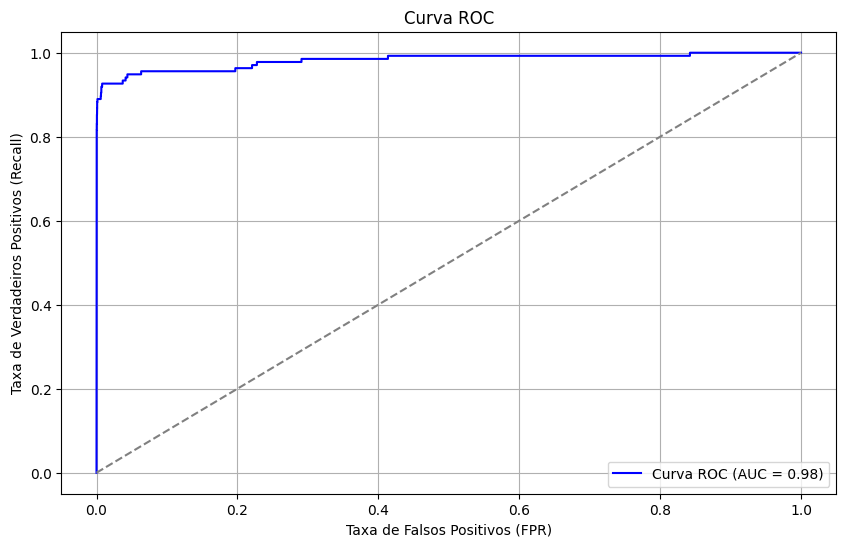

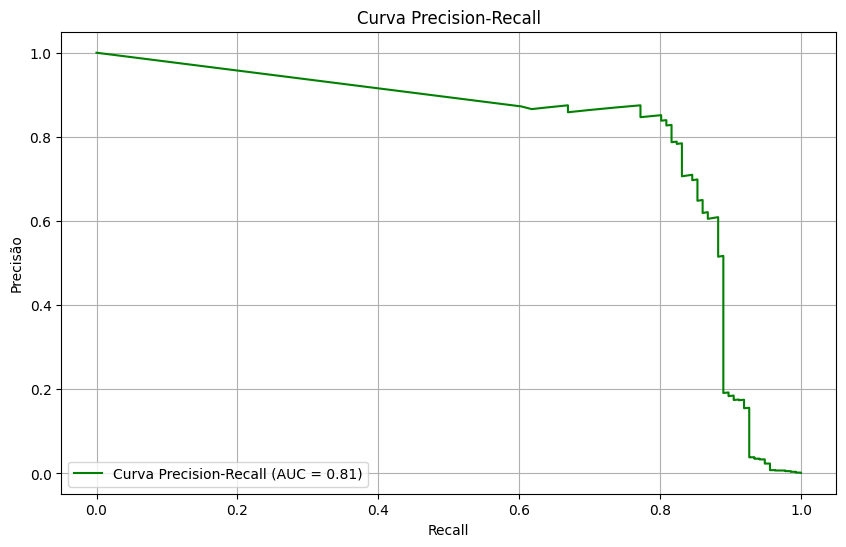

In [20]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5)

# Aplicar o ADASYN apenas nos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo ADASYN
model_lr = LogisticRegression()
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento ADASYN (sampling_strategy = 0.5 | n_neighbors=10) com Regressão Logística:**

-----------

-----

Acurácia: 0.9537
Acurácia Balanceada: 0.9474
Precisão: 0.0314
Revocação: 0.9412
F1 Score: 0.0607
ROC AUC: 0.9823
PR AUC: 0.8045

Matriz de Confusão:
 [[81356  3951]
 [    8   128]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     85307
           1       0.03      0.94      0.06       136

    accuracy                           0.95     85443
   macro avg       0.52      0.95      0.52     85443
weighted avg       1.00      0.95      0.97     85443



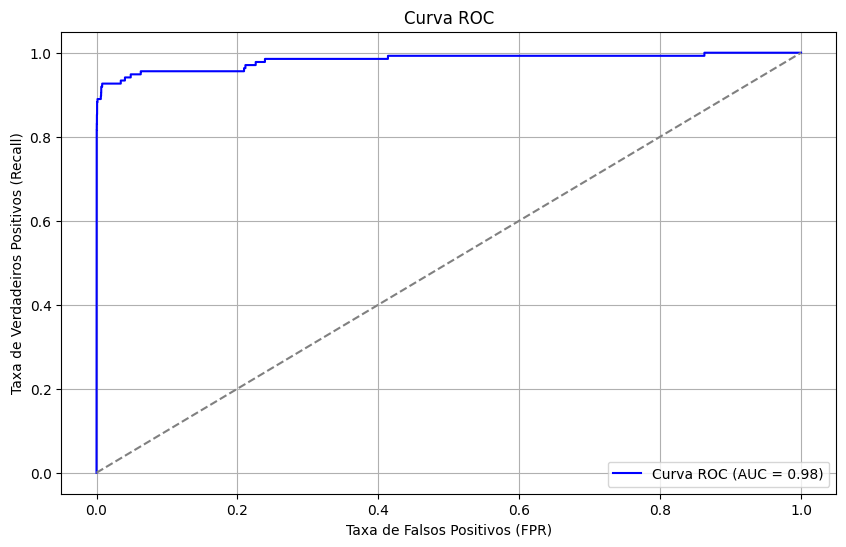

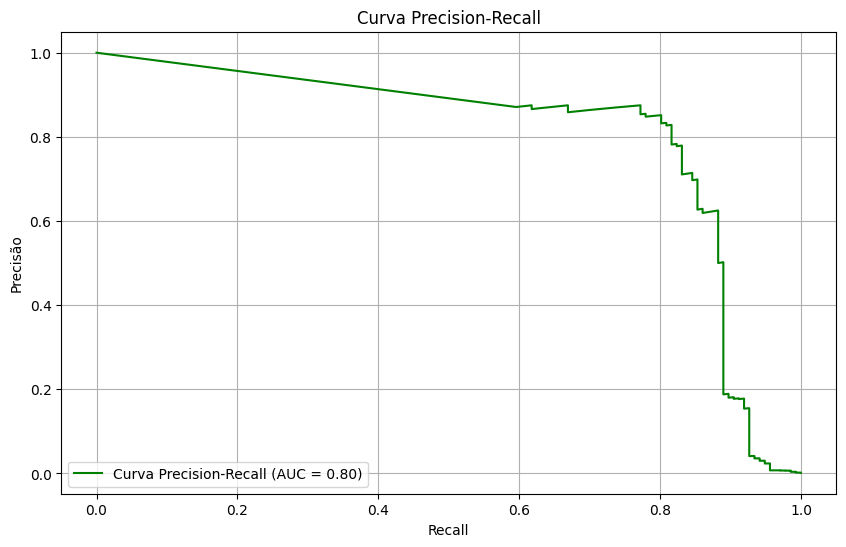

In [21]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN apenas nos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo ADASYN
model_lr = LogisticRegression()
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Gráfico Comparativo do balanceamento SMOTE com os classificadores de Regressão Logística:**

-----------

-----

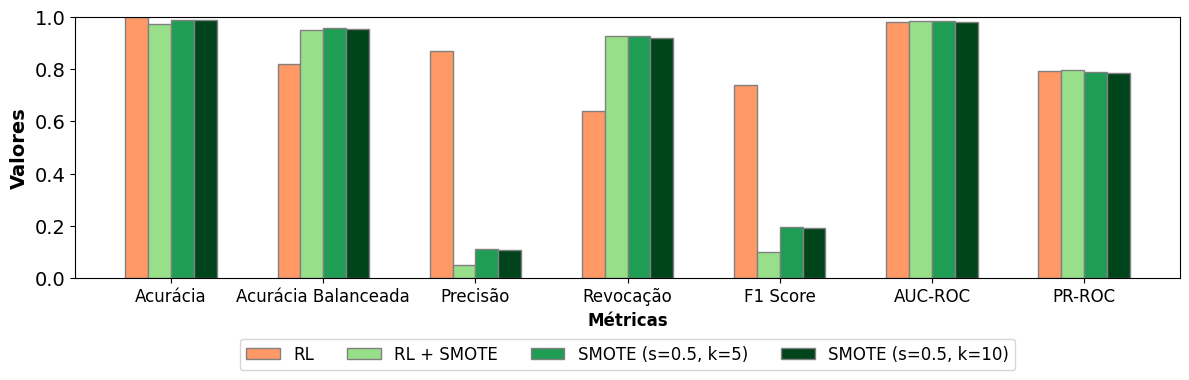

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir uma paleta de cores pastéis

colors = ['#ff9966', '#98df8a', '#1f9d55', '#00441b', '#6baed6', '#1f78b4', '#08306b']

# Dados das métricas para cada modelo
labels = ['Acurácia', 'Acurácia Balanceada', 'Precisão', 'Revocação', 'F1 Score', 'AUC-ROC', 'PR-ROC']
model_names = ['RL', 'RL + SMOTE', 'SMOTE (s=0.5, k=5)', 'SMOTE (s=0.5, k=10)']

# Métricas para cada modelo
metrics = [
    [0.9993, 0.8198, 0.8700, 0.6397, 0.7373, 0.9812, 0.7914],  # Regressão Logística (sem balanceamento)
    [0.9729, 0.9497, 0.0517, 0.9265, 0.0982, 0.9824, 0.7959],  # Regressão Logística + SMOTE
    [0.9880, 0.9573, 0.1102, 0.9265, 0.1970, 0.9824, 0.7874],  # SMOTE (sample=0.5, k=5)
    [0.9876, 0.9534, 0.1066, 0.9191, 0.1910, 0.9820, 0.7842],  # SMOTE (sample=0.5, k=10)
]

# Convertendo para um array numpy para facilitar o plotting
metrics = np.array(metrics)

# Configurando a largura das barras
barWidth = 0.15

# Configurando a posição das barras no eixo x
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Criando o gráfico de barras
plt.figure(figsize=(12, 4))

plt.bar(r1, metrics[0], color=colors[0], width=barWidth, edgecolor='grey', label=model_names[0])
plt.bar(r2, metrics[1], color=colors[1], width=barWidth, edgecolor='grey', label=model_names[1])
plt.bar(r3, metrics[2], color=colors[2], width=barWidth, edgecolor='grey', label=model_names[2])
plt.bar(r4, metrics[3], color=colors[3], width=barWidth, edgecolor='grey', label=model_names[3])

# Ajustar o limite do eixo y
plt.ylim(0, 1)  # Reduzindo a altura máxima do gráfico

# Adicionando os rótulos e título com tamanhos de fonte maiores
plt.xlabel('Métricas', fontweight='bold', fontsize=12)
plt.xticks([r + 1.5*barWidth for r in range(len(labels))], labels, fontsize=12)

# Aumentar o tamanho dos números no eixo Y
plt.yticks(fontsize=14)

plt.ylabel('Valores', fontweight='bold', fontsize=14)
#plt.title('Comparação de Métricas entre Modelos de Regressão Logística', size=12)

# Exibir a legenda mais próxima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=4, fontsize=12)

# Ajustar o layout para evitar cortes
plt.tight_layout()

# Mostrar o gráfico
plt.show()

-----------

-----



**Gráfico Comparativo do balanceamento ADASYN com os classificadores de Regressão Logística:**

-----------

-----


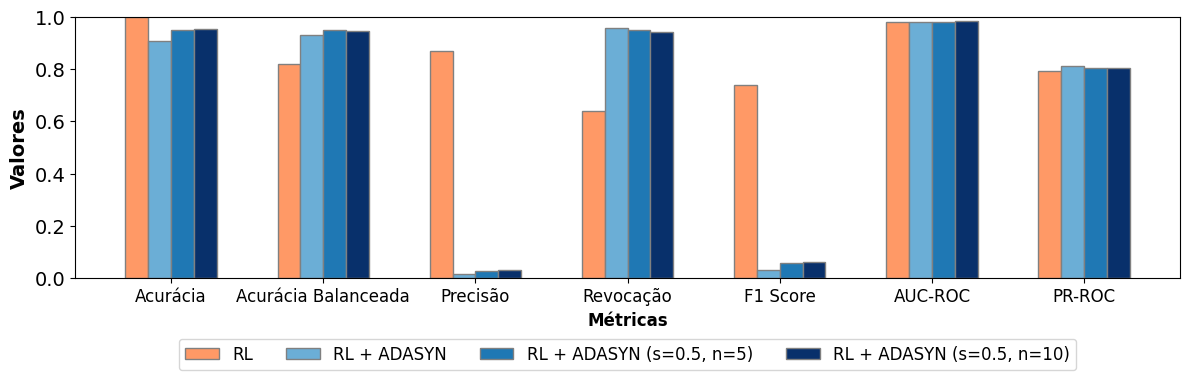

In [1]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['#ff9966', '#6baed6', '#1f78b4', '#08306b']

# Dados das métricas para cada modelo
labels = ['Acurácia', 'Acurácia Balanceada', 'Precisão', 'Revocação', 'F1 Score', 'AUC-ROC', 'PR-ROC']
model_names = ['RL', 'RL + ADASYN', 'RL + ADASYN (s=0.5, n=5)', 'RL + ADASYN (s=0.5, n=10)']

# Métricas para cada modelo (colocando os dados fornecidos)
metrics = [
    [0.9993, 0.8198, 0.8700, 0.6397, 0.7373, 0.9812, 0.7914],  # Regressão Logística (sem balanceamento)
    [0.9058, 0.9308, 0.0159, 0.9559, 0.0313, 0.9815, 0.8115],  # ADASYN
    [0.9494, 0.9490, 0.0290, 0.9485, 0.0563, 0.9821, 0.8054],  # ADASYN (sample=0.5, n=5)
    [0.9537, 0.9474, 0.0314, 0.9412, 0.0607, 0.9823, 0.8045],  # ADASYN (sample=0.5, n=10)
]

# Convertendo para um array numpy para facilitar o plotting
metrics = np.array(metrics)

# Configurando a largura das barras
barWidth = 0.15

# Configurando a posição das barras no eixo x
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Criando o gráfico de barras
plt.figure(figsize=(12, 4))


plt.bar(r1, metrics[0], color=colors[0], width=barWidth, edgecolor='grey', label=model_names[0])
plt.bar(r2, metrics[1], color=colors[1], width=barWidth, edgecolor='grey', label=model_names[1])
plt.bar(r3, metrics[2], color=colors[2], width=barWidth, edgecolor='grey', label=model_names[2])
plt.bar(r4, metrics[3], color=colors[3], width=barWidth, edgecolor='grey', label=model_names[3])

# Ajustar o limite do eixo y
plt.ylim(0, 1)  # Reduzindo a altura máxima do gráfico

# Adicionando os rótulos e título com tamanhos de fonte maiores
plt.xlabel('Métricas', fontweight='bold', fontsize=12)
plt.xticks([r + 1.5*barWidth for r in range(len(labels))], labels, fontsize=12)

# Aumentar o tamanho dos números no eixo Y
plt.yticks(fontsize=14)

plt.ylabel('Valores', fontweight='bold', fontsize=14)
#plt.title('Comparação de Métricas entre Modelos de Regressão Logística', size=12)

# Exibir a legenda mais próxima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=4, fontsize=12)

# Ajustar o layout para evitar cortes
plt.tight_layout()

# Mostrar o gráfico
plt.show()

-----------

-----



**Gráfico Comparativo do balanceamento SMOTE com os classificadores de Floresta Aleatória:**

-----------


-----

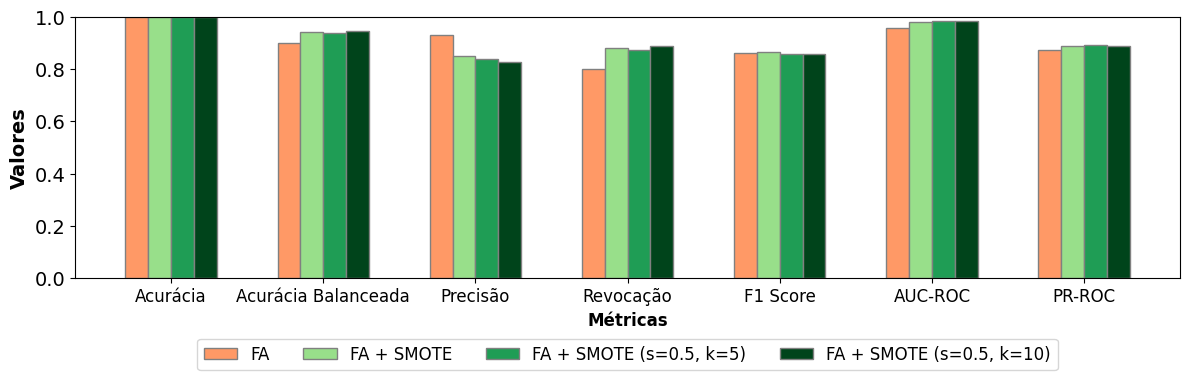

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir uma paleta de cores pastéis
colors = ['#ff9966', '#98df8a', '#1f9d55', '#00441b', '#6baed6', '#1f78b4', '#08306b']

# Dados das métricas para cada modelo
labels = ['Acurácia', 'Acurácia Balanceada', 'Precisão', 'Revocação', 'F1 Score', 'AUC-ROC', 'PR-ROC']

# Nomes dos modelos ajustados para Floresta Aleatória
model_names = ['FA',
               'FA + SMOTE',
               'FA + SMOTE (s=0.5, k=5)',
               'FA + SMOTE (s=0.5, k=10)'
   ]

# Métricas para cada modelo (ajustado com os valores fornecidos anteriormente)
metrics = [
    [0.9996, 0.9007, 0.9316, 0.8015, 0.8617, 0.9583, 0.8724],  # FA
    [0.9996, 0.9411, 0.8511, 0.8824, 0.8664, 0.9801, 0.8868],  # FA + SMOTE
    [0.9995, 0.9374, 0.8380, 0.8750, 0.8561, 0.9851, 0.8911],  # FA + SMOTE (s=0.5, k=5)'
    [0.9995, 0.9447, 0.8288, 0.8897, 0.8582, 0.9836, 0.8896],  # FA + SMOTE (s=0.5, k=10)

]

# Convertendo para um array numpy para facilitar o plotting
metrics = np.array(metrics)

# Configurando a largura das barras
barWidth = 0.15

# Configurando a posição das barras no eixo x
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Criando o gráfico de barras
plt.figure(figsize=(12, 4))


plt.bar(r1, metrics[0], color=colors[0], width=barWidth, edgecolor='grey', label=model_names[0])
plt.bar(r2, metrics[1], color=colors[1], width=barWidth, edgecolor='grey', label=model_names[1])
plt.bar(r3, metrics[2], color=colors[2], width=barWidth, edgecolor='grey', label=model_names[2])
plt.bar(r4, metrics[3], color=colors[3], width=barWidth, edgecolor='grey', label=model_names[3])

# Ajustar o limite do eixo y
plt.ylim(0, 1)  # Reduzindo a altura máxima do gráfico

# Adicionando os rótulos e título com tamanhos de fonte maiores
plt.xlabel('Métricas', fontweight='bold', fontsize=12)
plt.xticks([r + 1.5*barWidth for r in range(len(labels))], labels, fontsize=12)

# Aumentar o tamanho dos números no eixo Y
plt.yticks(fontsize=14)

plt.ylabel('Valores', fontweight='bold', fontsize=14)
#plt.title('Comparação de Métricas entre Modelos de Floresta Aleatória', size=12)

# Exibir a legenda mais próxima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=4, fontsize=12)

# Ajustar o layout para evitar cortes
plt.tight_layout()

# Mostrar o gráfico
plt.show()

----

-----

**Gráfico Comparativo do balanceamento ADASYN com os classificadores de Floresta Aleatória:**


----

-----

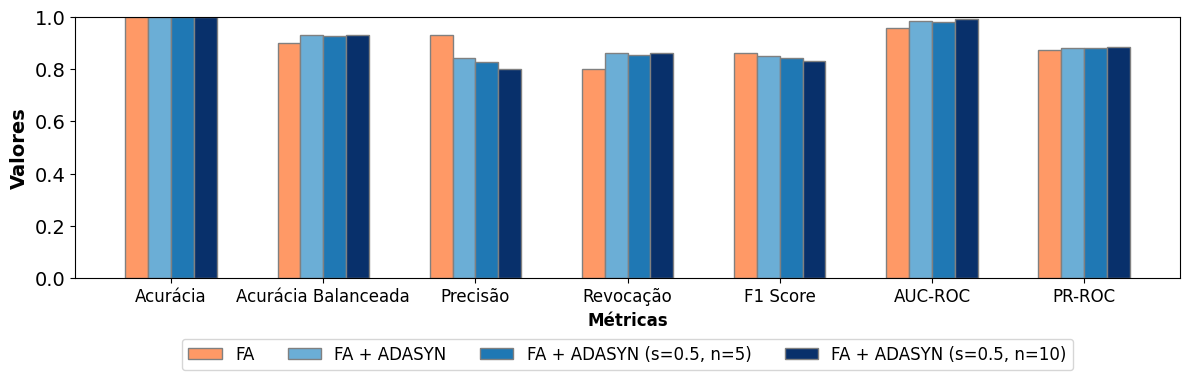

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir uma paleta de cores pastéis
colors = ['#ff9966', '#6baed6', '#1f78b4', '#08306b']

# Dados das métricas para cada modelo
labels = ['Acurácia', 'Acurácia Balanceada', 'Precisão', 'Revocação', 'F1 Score', 'AUC-ROC', 'PR-ROC']

# Nomes dos modelos ajustados para Floresta Aleatória
model_names = ['FA',
               'FA + ADASYN',
               'FA + ADASYN (s=0.5, n=5)',
               'FA + ADASYN (s=0.5, n=10)']

# Métricas para cada modelo
metrics = [
    [0.9996, 0.9007, 0.9316, 0.8015, 0.8617, 0.9583, 0.8724],  # FA
    [0.9995, 0.9300, 0.8417, 0.8603, 0.8509, 0.9841, 0.8822],  # FA + ADASYN
    [0.9995, 0.9263, 0.8286, 0.8529, 0.8406, 0.9805, 0.8810],  # FA + ADASYN (s=0.5, n=5)
    [0.9994, 0.9300, 0.8014, 0.8603, 0.8298, 0.9908, 0.8839]   # FA + ADASYN (s=0.5, n=10)
]

# Convertendo para um array numpy para facilitar o plotting
metrics = np.array(metrics)

# Configurando a largura das barras
barWidth = 0.15

# Configurando a posição das barras no eixo x
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Criando o gráfico de barras
plt.figure(figsize=(12, 4))


plt.bar(r1, metrics[0], color=colors[0], width=barWidth, edgecolor='grey', label=model_names[0])
plt.bar(r2, metrics[1], color=colors[1], width=barWidth, edgecolor='grey', label=model_names[1])
plt.bar(r3, metrics[2], color=colors[2], width=barWidth, edgecolor='grey', label=model_names[2])
plt.bar(r4, metrics[3], color=colors[3], width=barWidth, edgecolor='grey', label=model_names[3])

# Ajustar o limite do eixo y
plt.ylim(0, 1)  # Reduzindo a altura máxima do gráfico

# Adicionando os rótulos e título com tamanhos de fonte maiores
plt.xlabel('Métricas', fontweight='bold', fontsize=12)
plt.xticks([r + 1.5*barWidth for r in range(len(labels))], labels, fontsize=12)

# Aumentar o tamanho dos números no eixo Y
plt.yticks(fontsize=14)

plt.ylabel('Valores', fontweight='bold', fontsize=14)
#plt.title('Comparação de Métricas entre Modelos de Floresta Aleatória', size=12)

# Exibir a legenda mais próxima do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=4, fontsize=12)

# Ajustar o layout para evitar cortes
plt.tight_layout()

# Mostrar o gráfico
plt.show()


---

---

**Definido qual técnica de balanceamento teve melhor performance, iremos ajustar os hiperparâmetros da Floresta Aleatória:**

---

---

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid01**

----------------------

----------------------


Acurácia: 0.9995
Acurácia Balanceada: 0.9337
Precisão: 0.8310
Revocação: 0.8676
F1 Score: 0.8489
ROC AUC: 0.9848
PR AUC: 0.8952

Matriz de Confusão:
 [[85283    24]
 [   18   118]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.87      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



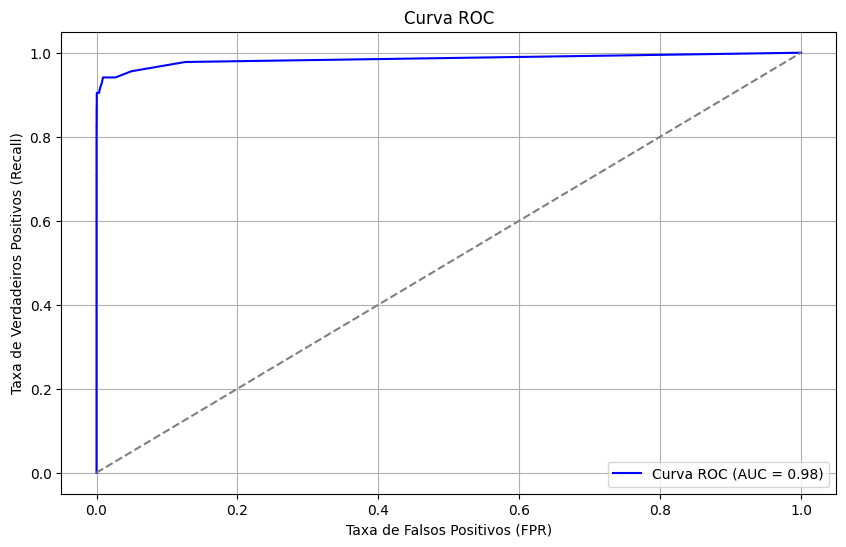

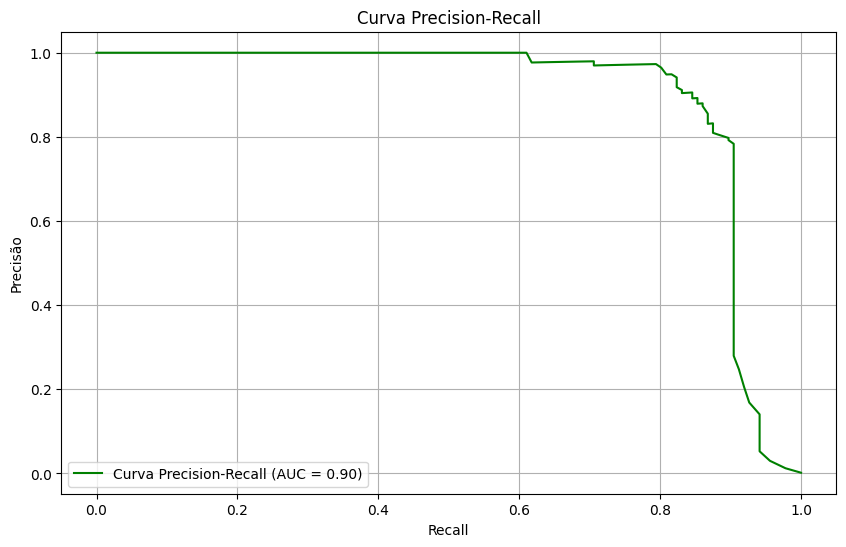

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='entropy', max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()





----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid02**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9337
Precisão: 0.8138
Revocação: 0.8676
F1 Score: 0.8399
ROC AUC: 0.9856
PR AUC: 0.8883

Matriz de Confusão:
 [[85280    27]
 [   18   118]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.87      0.84       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



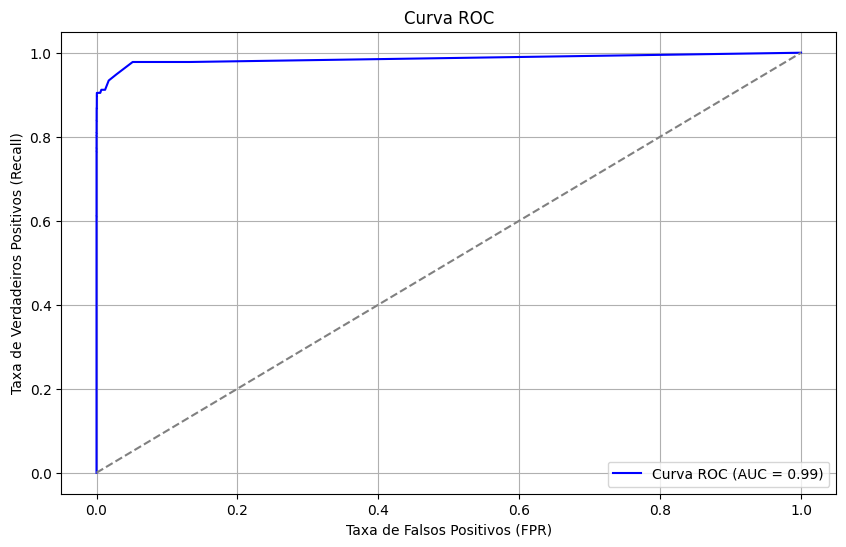

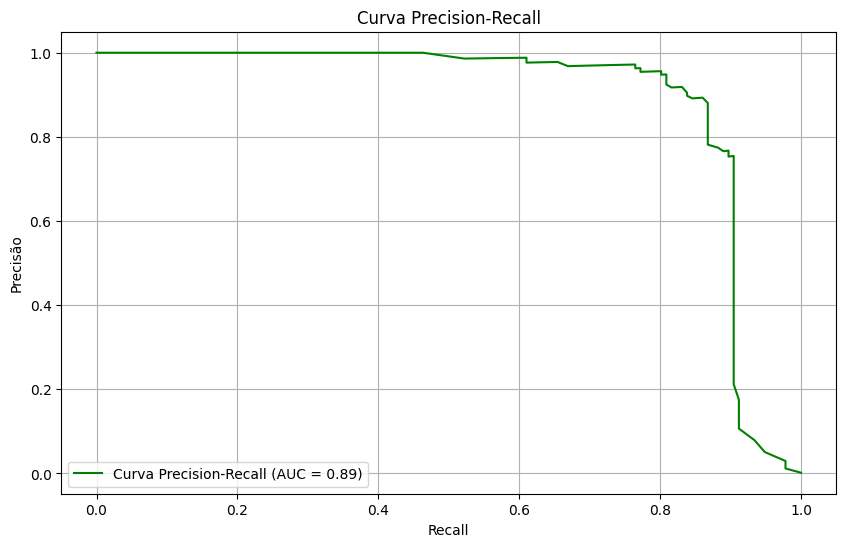

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='entropy', max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid03**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9337
Precisão: 0.8310
Revocação: 0.8676
F1 Score: 0.8489
ROC AUC: 0.9848
PR AUC: 0.8952

Matriz de Confusão:
 [[85283    24]
 [   18   118]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.87      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



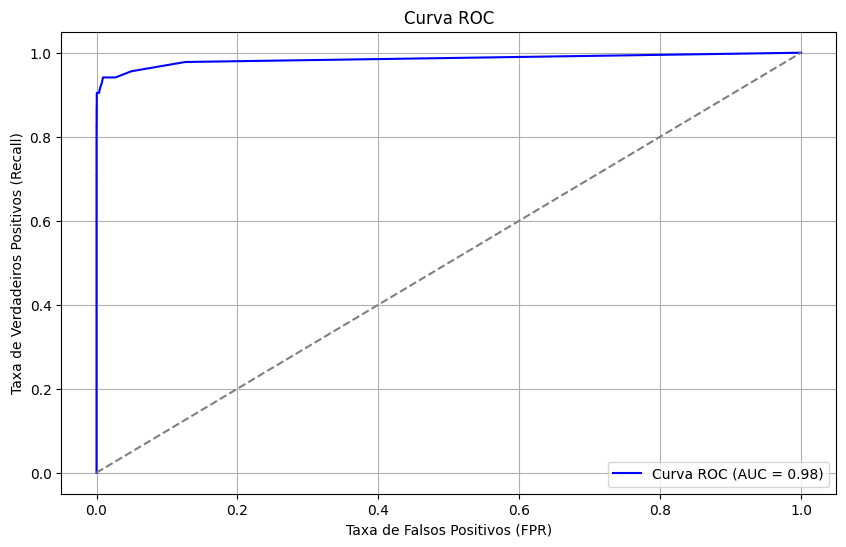

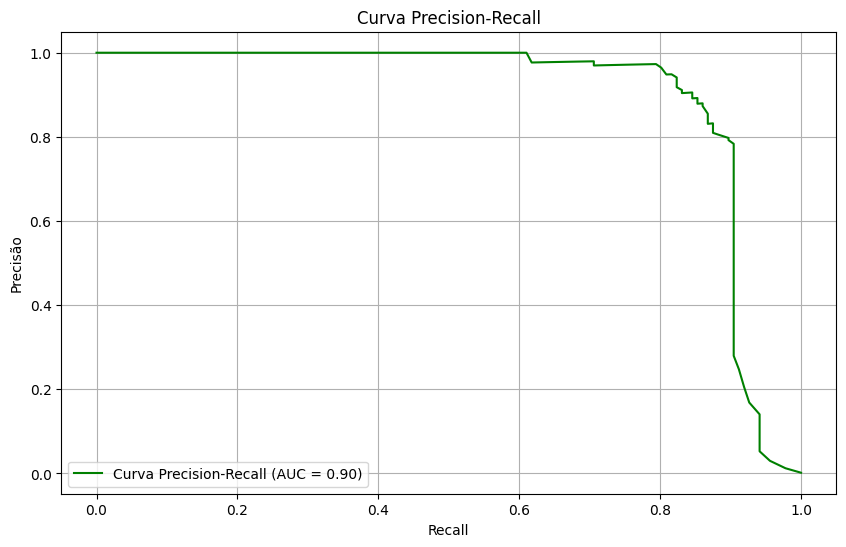

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='log_loss', max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid04**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9337
Precisão: 0.8138
Revocação: 0.8676
F1 Score: 0.8399
ROC AUC: 0.9856
PR AUC: 0.8883

Matriz de Confusão:
 [[85280    27]
 [   18   118]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.87      0.84       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



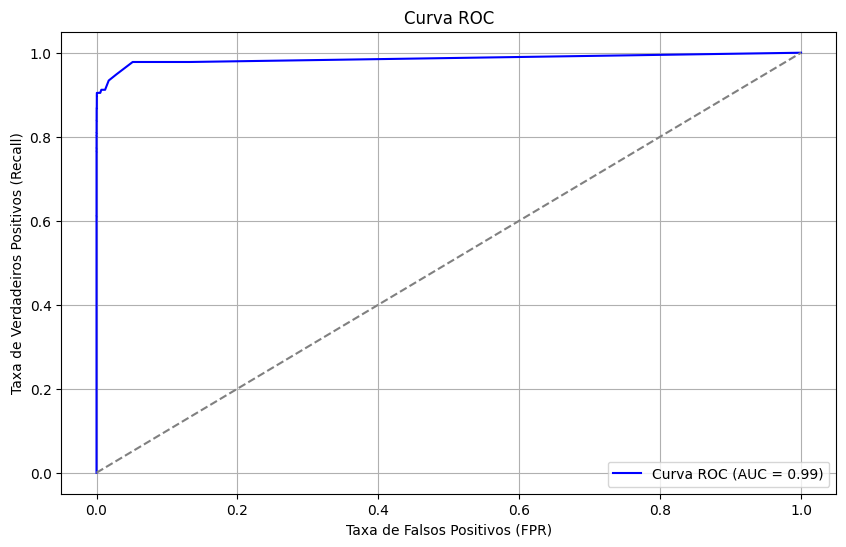

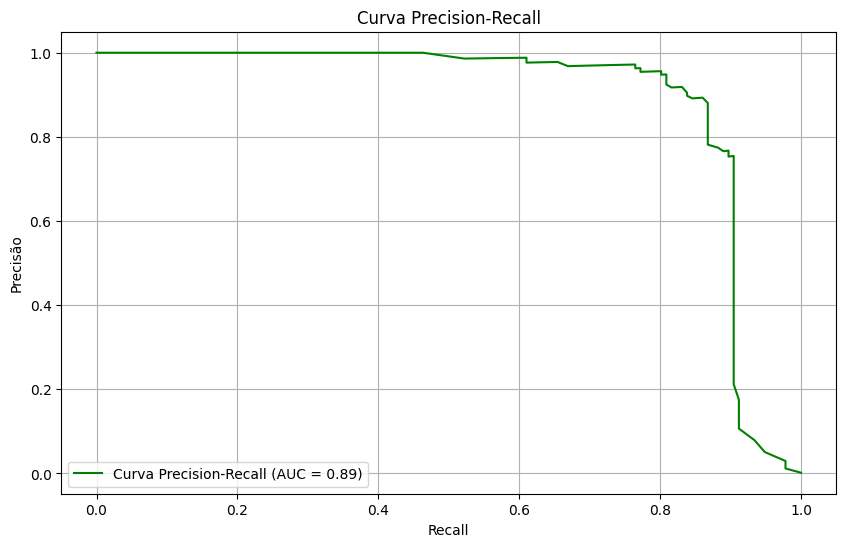

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='log_loss', max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid05**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9374
Precisão: 0.8322
Revocação: 0.8750
F1 Score: 0.8530
ROC AUC: 0.9883
PR AUC: 0.8958

Matriz de Confusão:
 [[85283    24]
 [   17   119]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.88      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



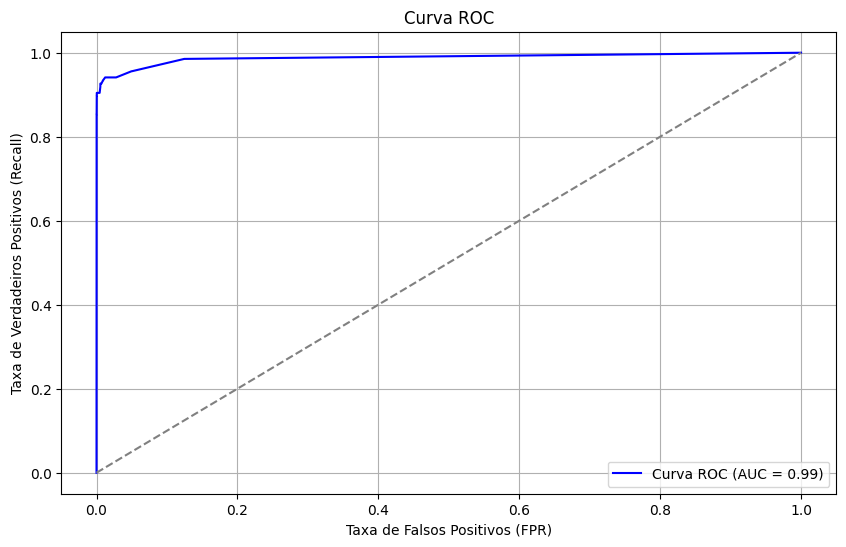

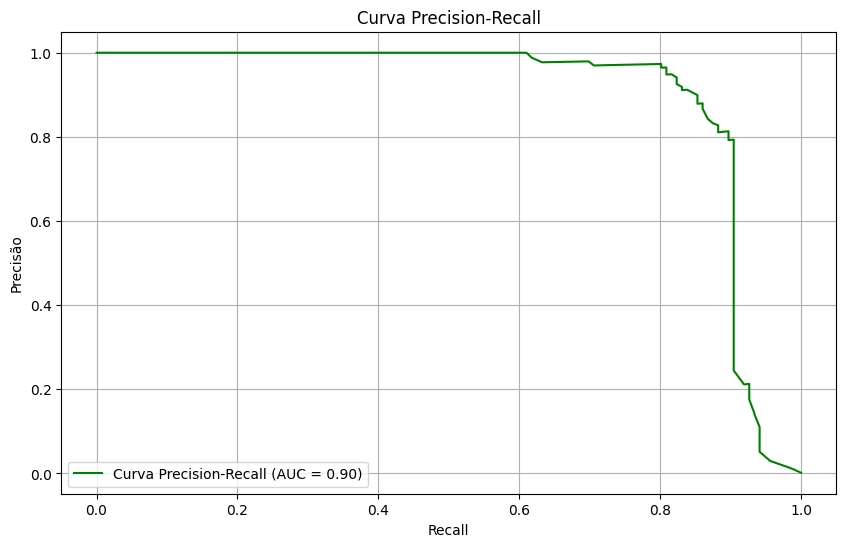

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='entropy', max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid06**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9337
Precisão: 0.8252
Revocação: 0.8676
F1 Score: 0.8459
ROC AUC: 0.9880
PR AUC: 0.8883

Matriz de Confusão:
 [[85282    25]
 [   18   118]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.87      0.85       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



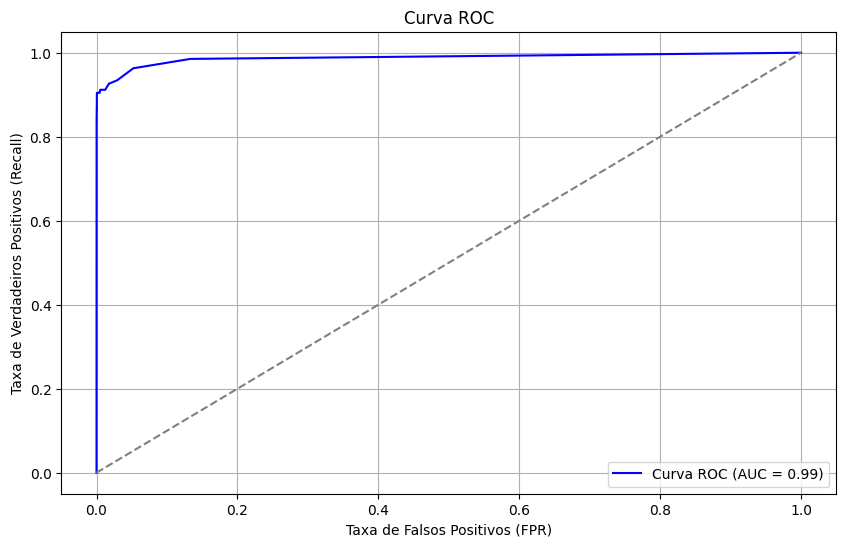

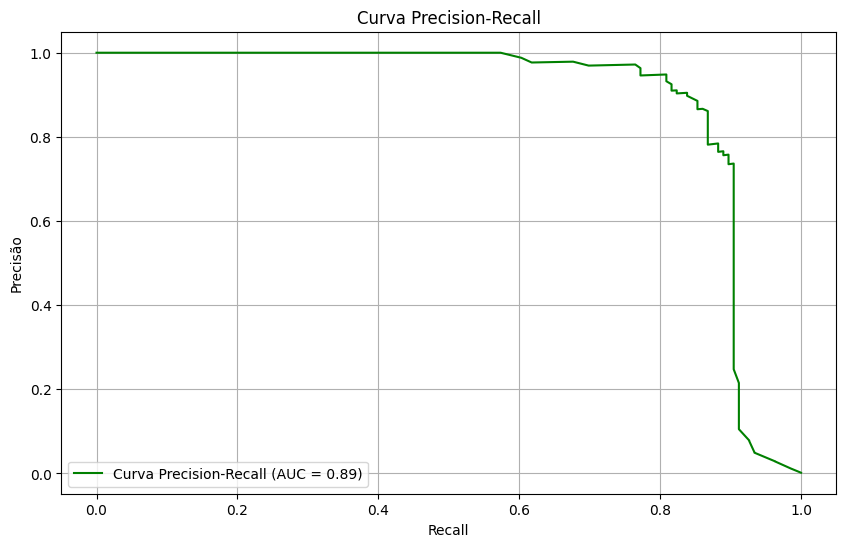

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='entropy', max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid07**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9374
Precisão: 0.8322
Revocação: 0.8750
F1 Score: 0.8530
ROC AUC: 0.9883
PR AUC: 0.8958

Matriz de Confusão:
 [[85283    24]
 [   17   119]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.88      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



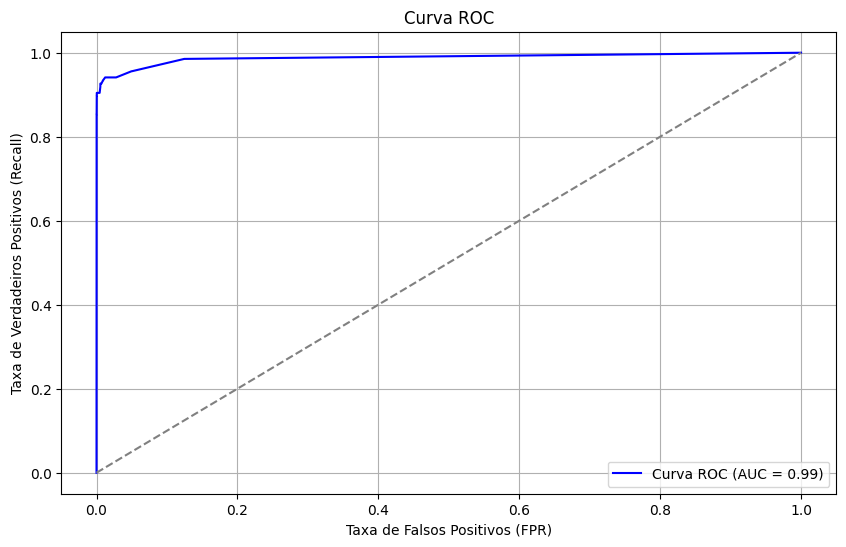

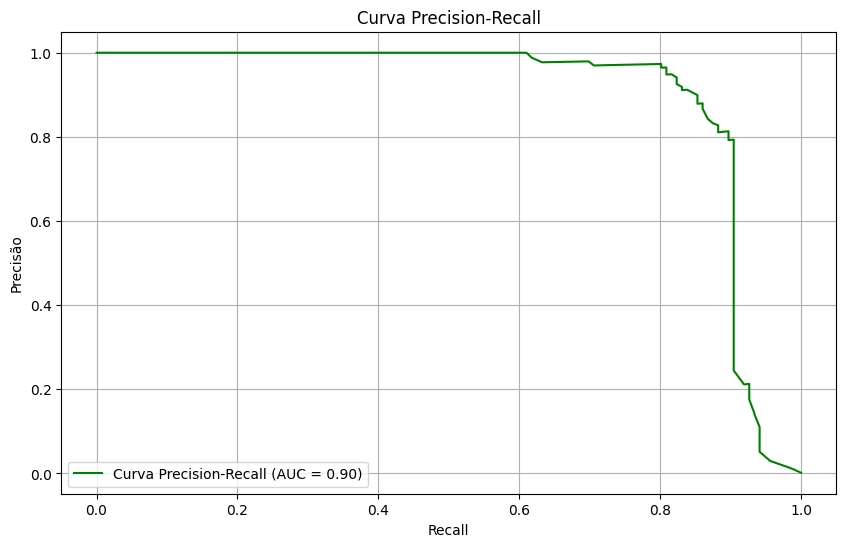

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='log_loss', max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid08**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9337
Precisão: 0.8252
Revocação: 0.8676
F1 Score: 0.8459
ROC AUC: 0.9880
PR AUC: 0.8883

Matriz de Confusão:
 [[85282    25]
 [   18   118]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.87      0.85       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



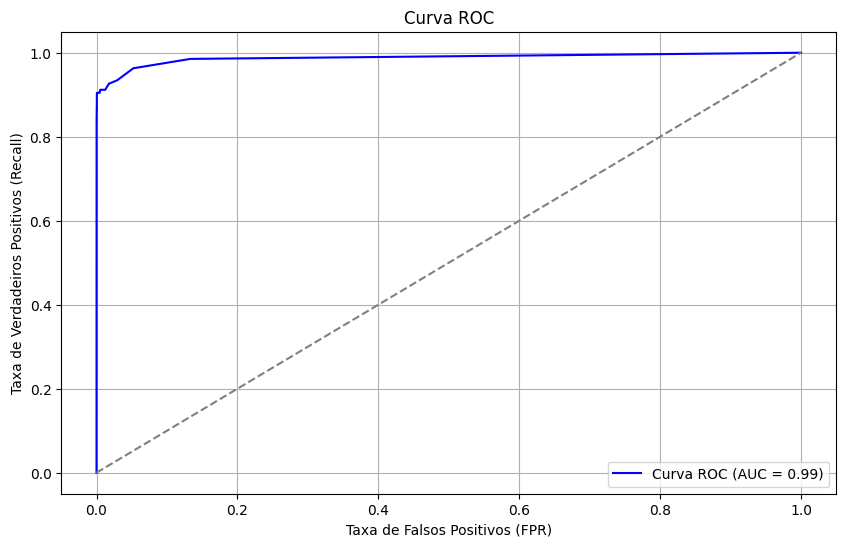

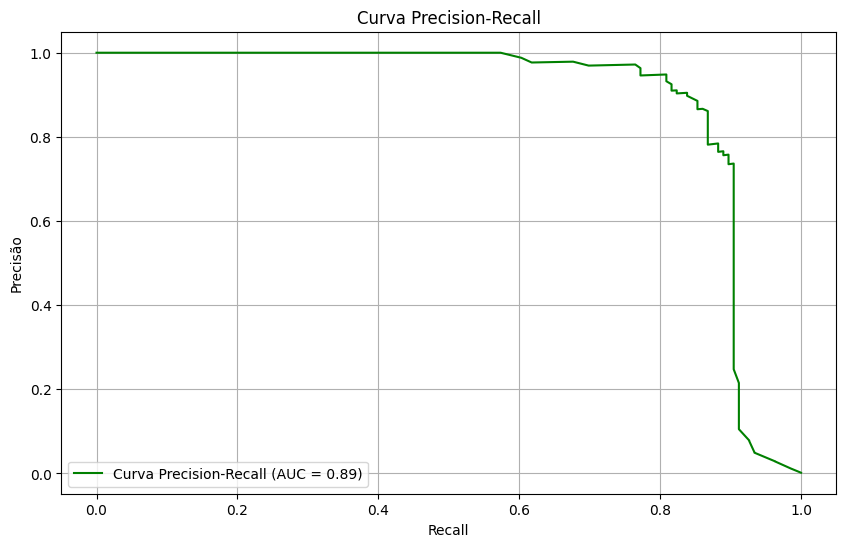

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='log_loss', max_features='log2')
model_rf.fit(X_resampled, y_resampled)


# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid09**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9410
Precisão: 0.8392
Revocação: 0.8824
F1 Score: 0.8602
ROC AUC: 0.9767
PR AUC: 0.8854

Matriz de Confusão:
 [[85284    23]
 [   16   120]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.88      0.86       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



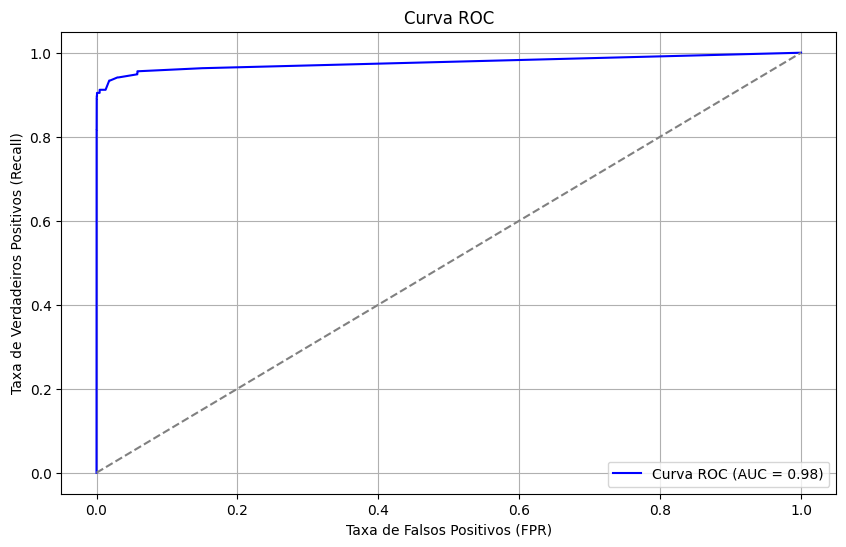

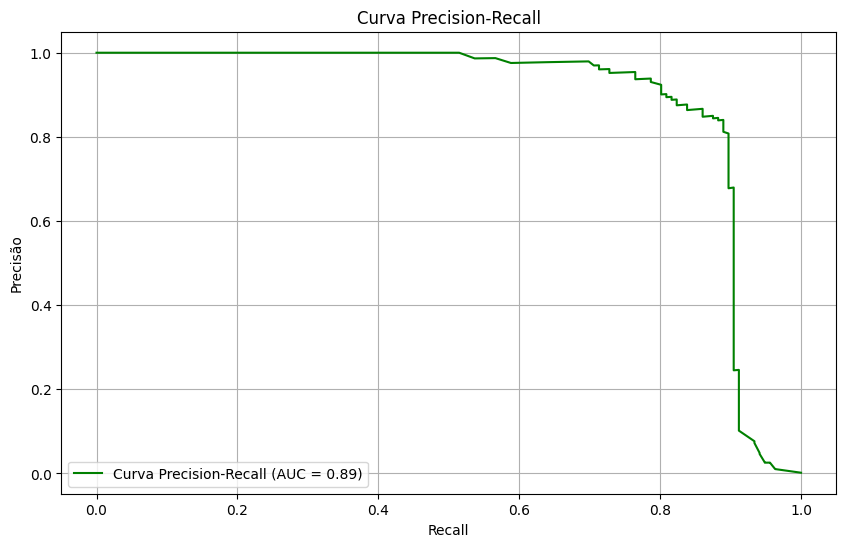

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='gini', max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)


# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid10**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9410
Precisão: 0.8333
Revocação: 0.8824
F1 Score: 0.8571
ROC AUC: 0.9830
PR AUC: 0.8841

Matriz de Confusão:
 [[85283    24]
 [   16   120]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.88      0.86       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



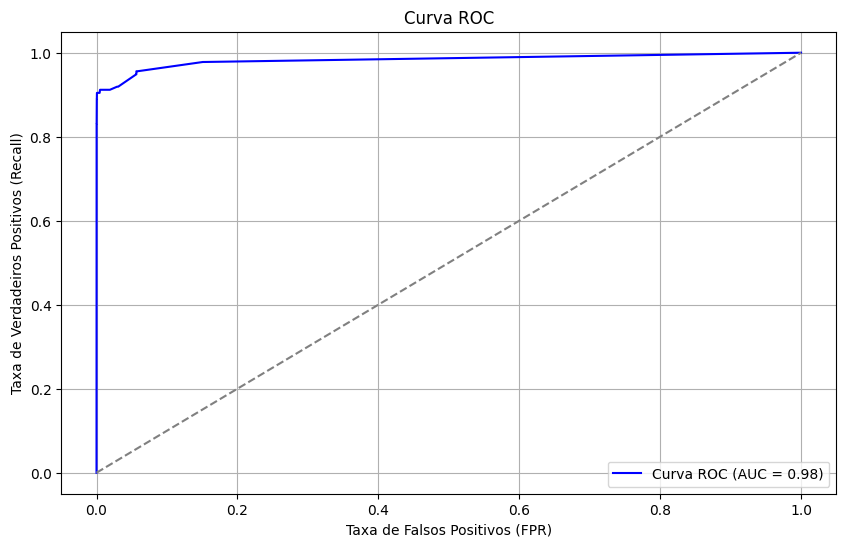

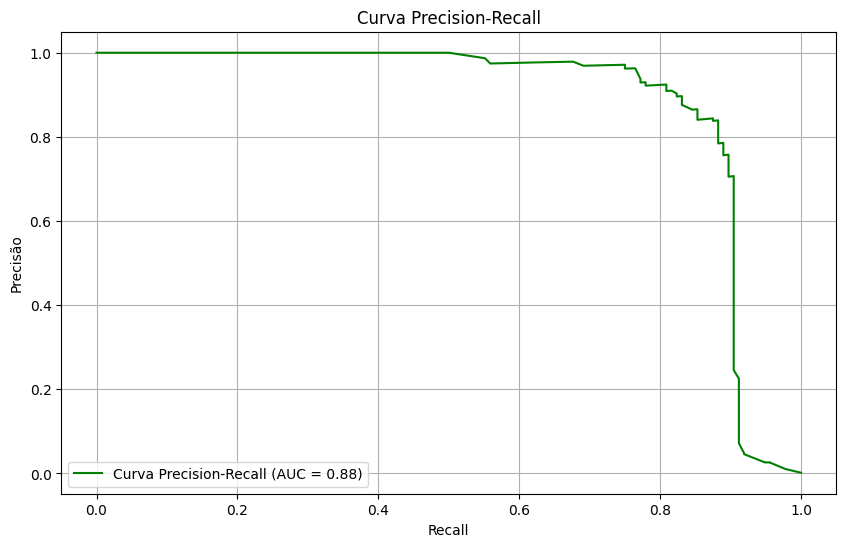

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='gini', max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid11**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9373
Precisão: 0.8151
Revocação: 0.8750
F1 Score: 0.8440
ROC AUC: 0.9851
PR AUC: 0.8927

Matriz de Confusão:
 [[85280    27]
 [   17   119]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.88      0.84       136

    accuracy                           1.00     85443
   macro avg       0.91      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443



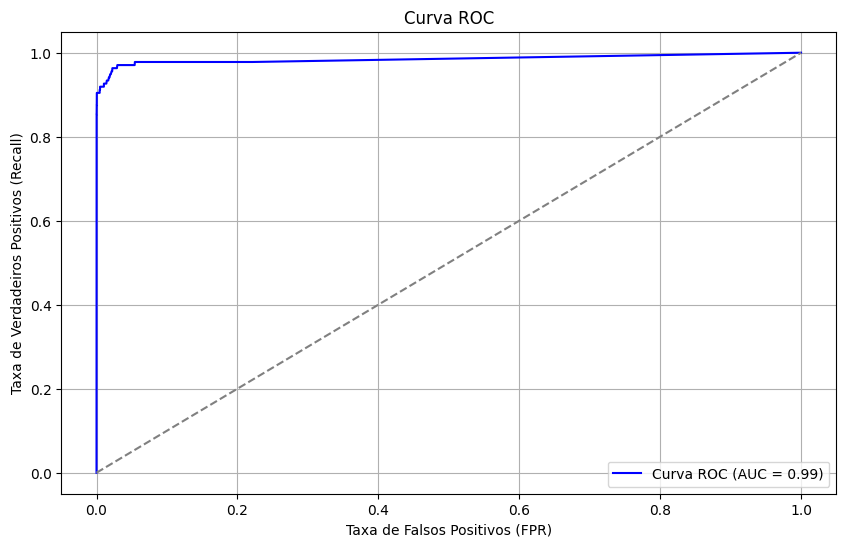

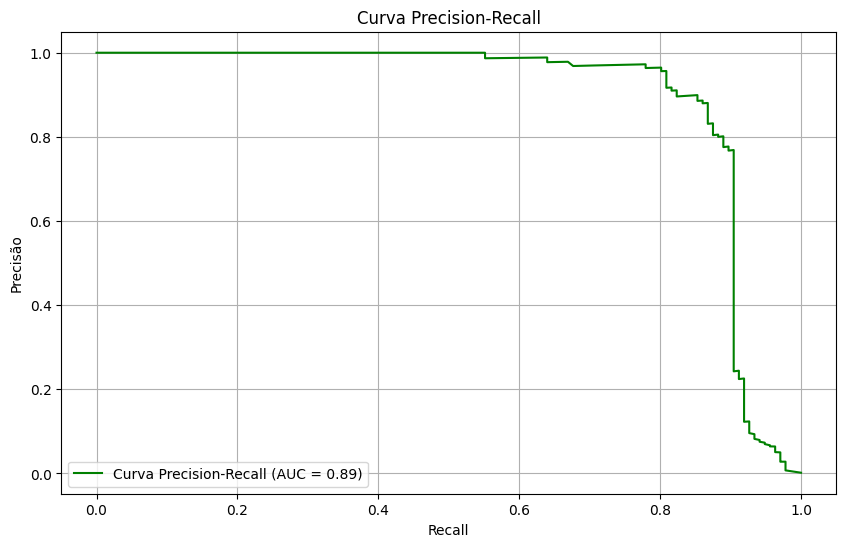

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='entropy',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)


# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid12**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9373
Precisão: 0.8151
Revocação: 0.8750
F1 Score: 0.8440
ROC AUC: 0.9843
PR AUC: 0.8922

Matriz de Confusão:
 [[85280    27]
 [   17   119]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.88      0.84       136

    accuracy                           1.00     85443
   macro avg       0.91      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443



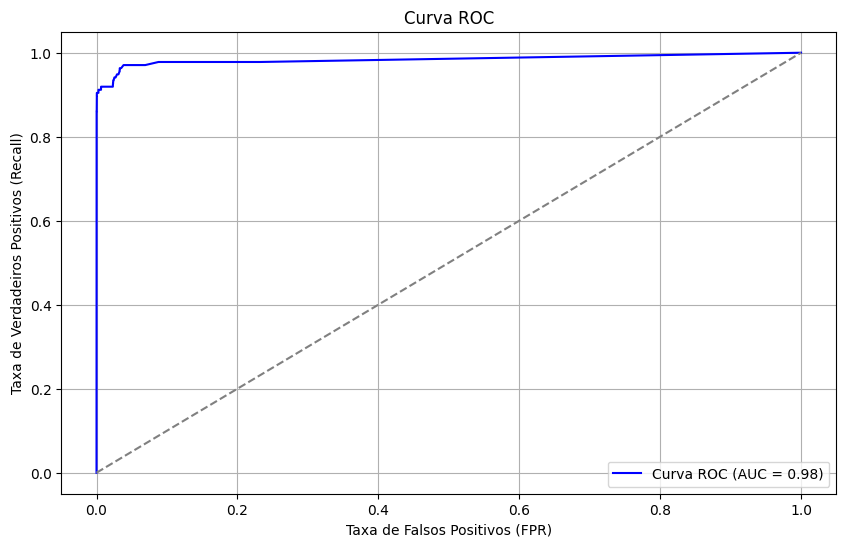

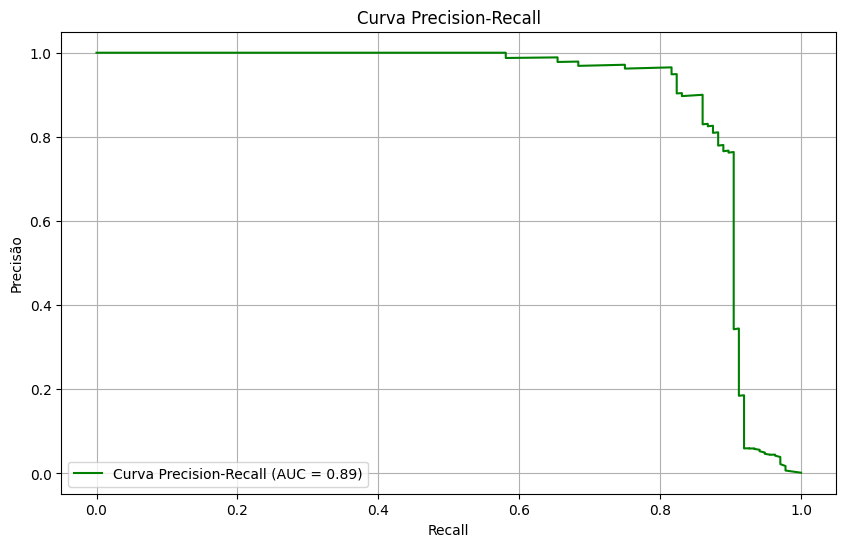

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='entropy',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid13**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9373
Precisão: 0.8151
Revocação: 0.8750
F1 Score: 0.8440
ROC AUC: 0.9851
PR AUC: 0.8927

Matriz de Confusão:
 [[85280    27]
 [   17   119]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.88      0.84       136

    accuracy                           1.00     85443
   macro avg       0.91      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443



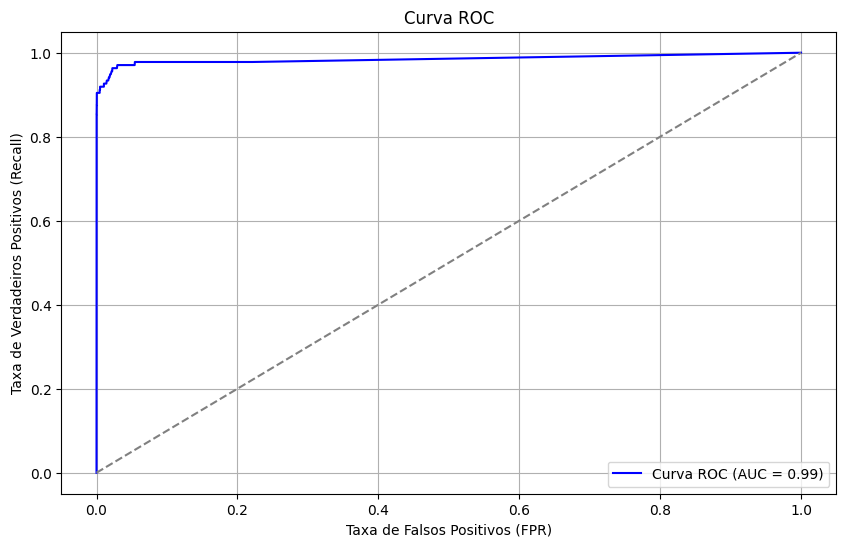

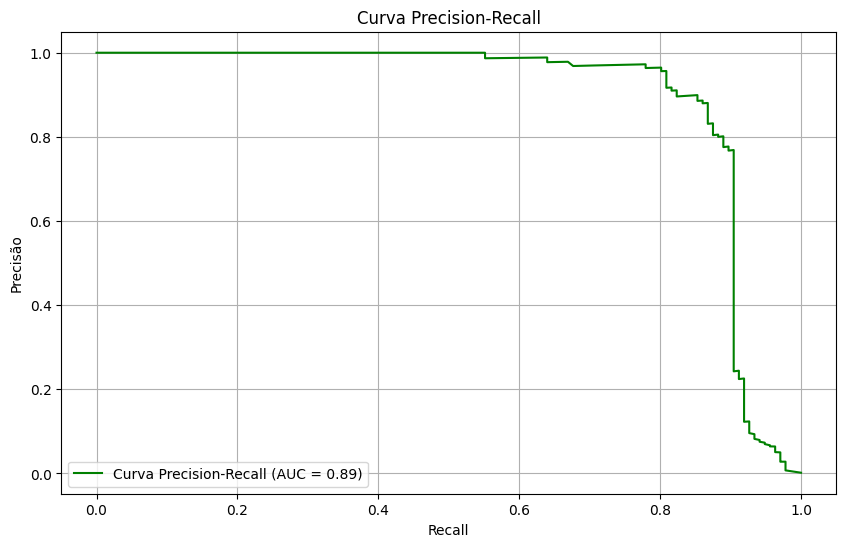

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='log_loss',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid14**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9373
Precisão: 0.8151
Revocação: 0.8750
F1 Score: 0.8440
ROC AUC: 0.9843
PR AUC: 0.8922

Matriz de Confusão:
 [[85280    27]
 [   17   119]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.88      0.84       136

    accuracy                           1.00     85443
   macro avg       0.91      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443



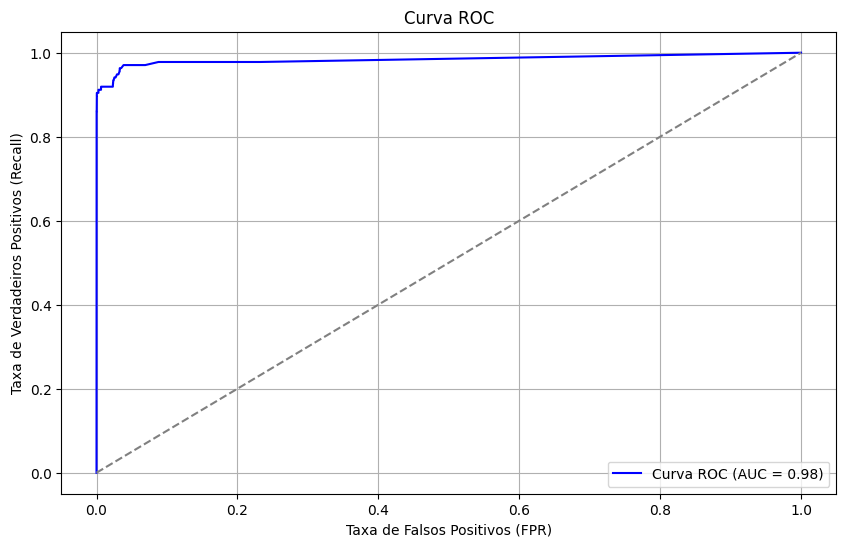

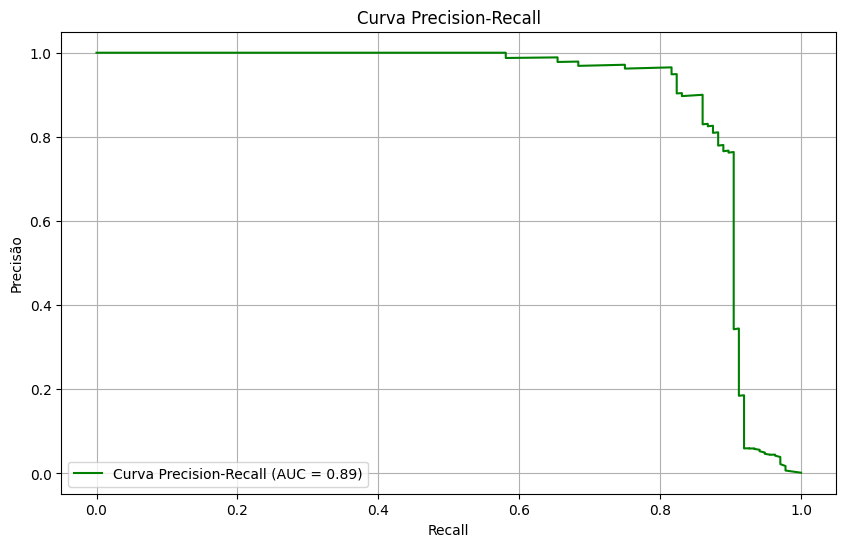

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='log_loss',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid15**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9410
Precisão: 0.8219
Revocação: 0.8824
F1 Score: 0.8511
ROC AUC: 0.9885
PR AUC: 0.8858

Matriz de Confusão:
 [[85281    26]
 [   16   120]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.88      0.85       136

    accuracy                           1.00     85443
   macro avg       0.91      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



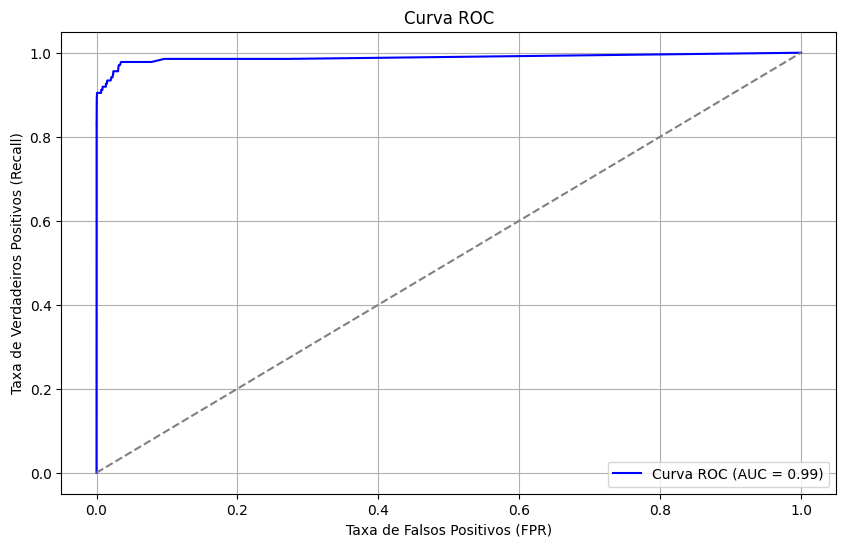

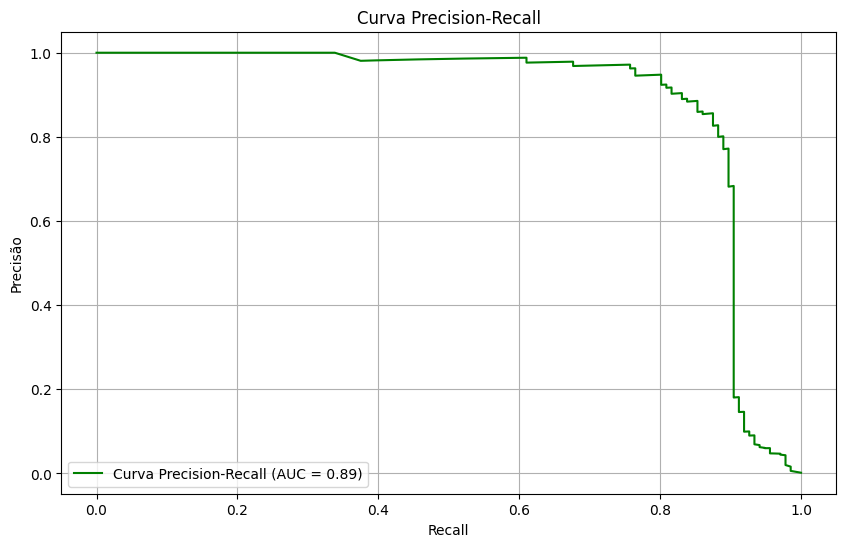

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='gini',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid16**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9410
Precisão: 0.8276
Revocação: 0.8824
F1 Score: 0.8541
ROC AUC: 0.9834
PR AUC: 0.8874

Matriz de Confusão:
 [[85282    25]
 [   16   120]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.88      0.85       136

    accuracy                           1.00     85443
   macro avg       0.91      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



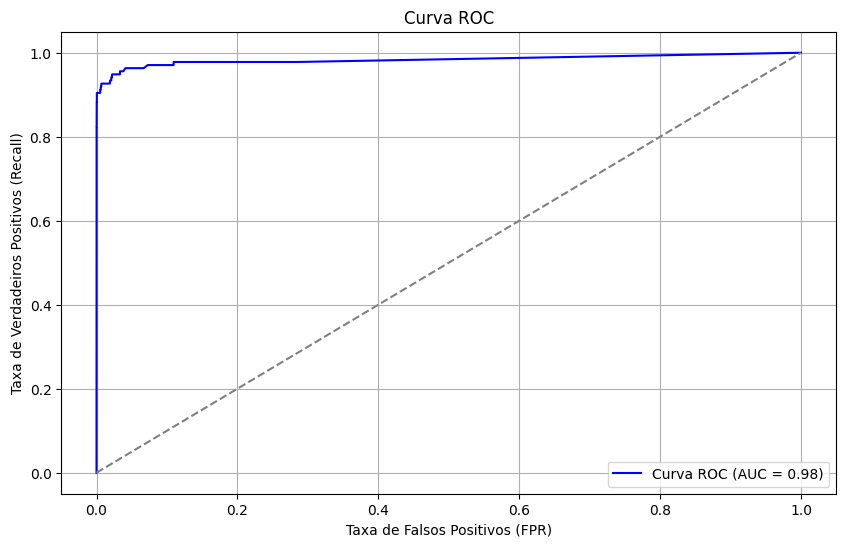

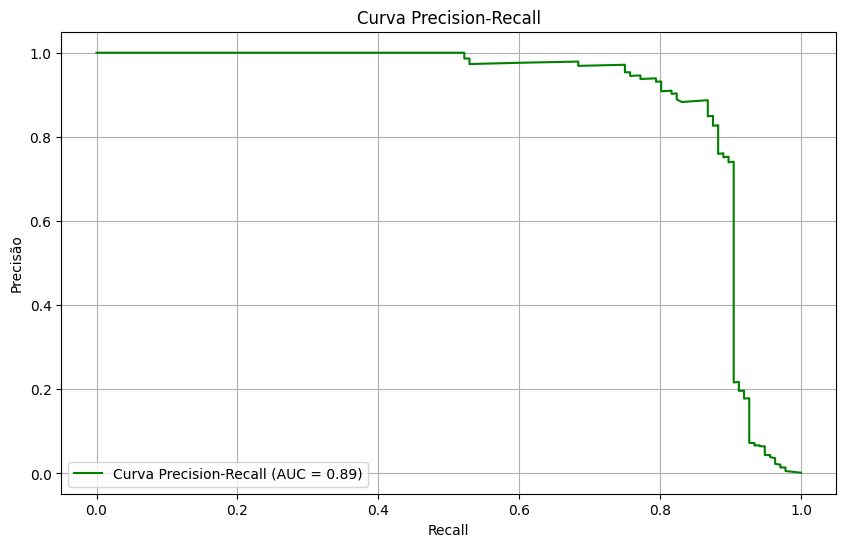

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='gini',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADASYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid17**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9300
Precisão: 0.8540
Revocação: 0.8603
F1 Score: 0.8571
ROC AUC: 0.9815
PR AUC: 0.8810

Matriz de Confusão:
 [[85287    20]
 [   19   117]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.86      0.86       136

    accuracy                           1.00     85443
   macro avg       0.93      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



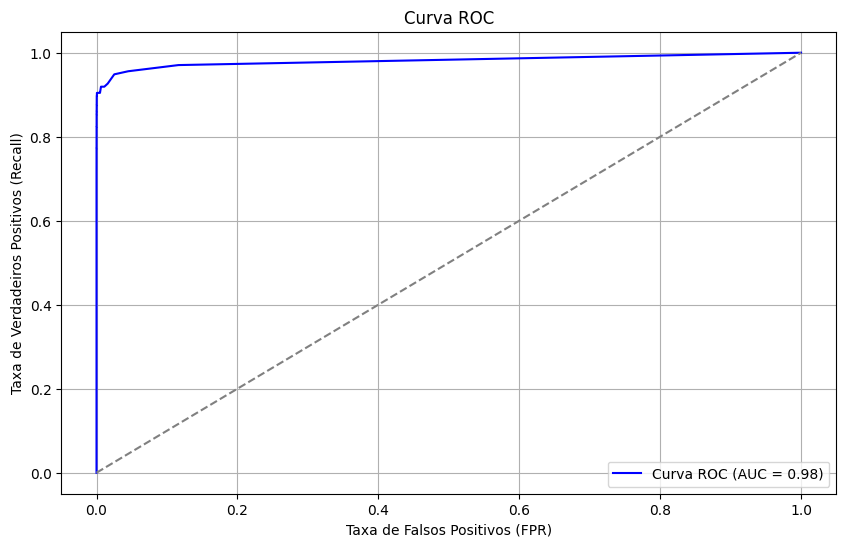

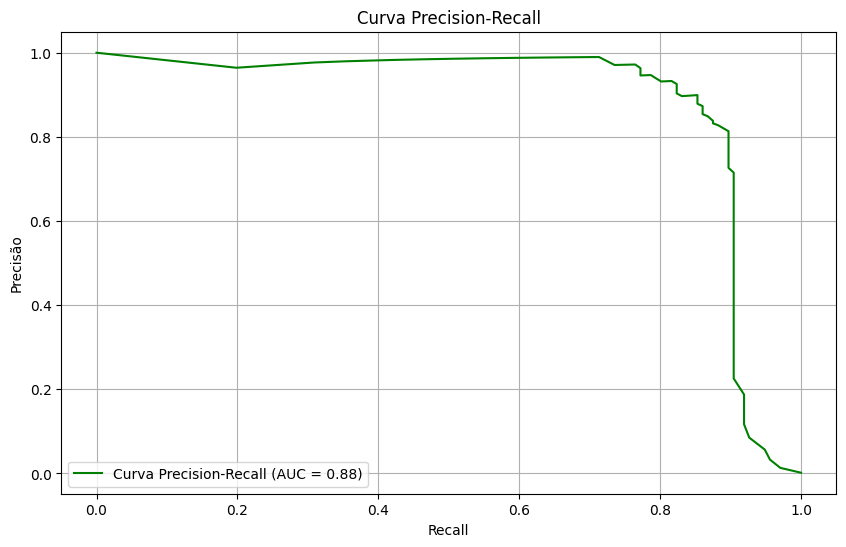

In [7]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, criterion='entropy',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid18**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='entropy',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid19**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9300
Precisão: 0.8540
Revocação: 0.8603
F1 Score: 0.8571
ROC AUC: 0.9815
PR AUC: 0.8810

Matriz de Confusão:
 [[85287    20]
 [   19   117]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.86      0.86       136

    accuracy                           1.00     85443
   macro avg       0.93      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



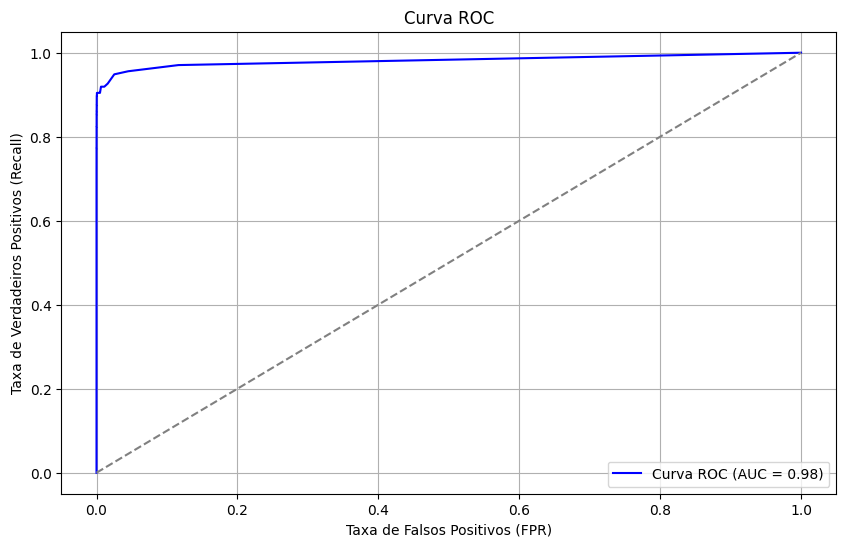

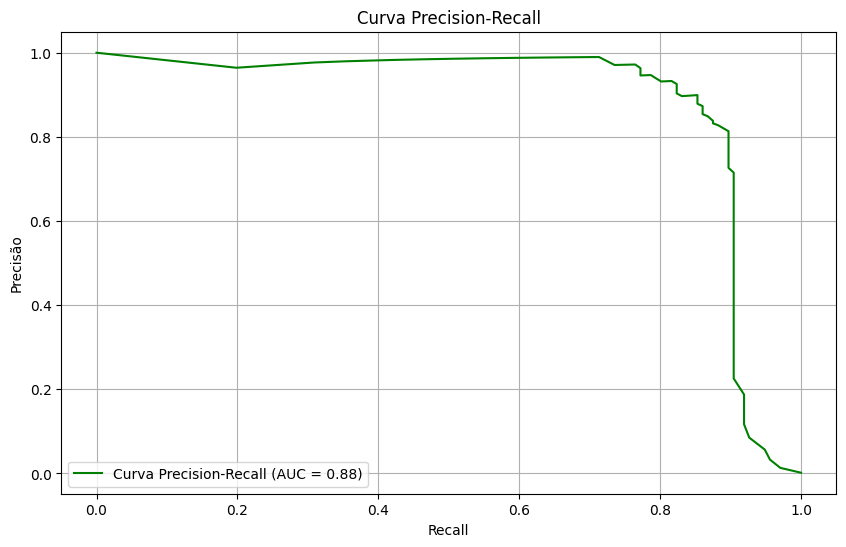

In [9]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='log_loss',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid20**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, criterion='log_loss',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid21**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='entropy',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid22**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9263
Precisão: 0.8345
Revocação: 0.8529
F1 Score: 0.8436
ROC AUC: 0.9850
PR AUC: 0.8906

Matriz de Confusão:
 [[85284    23]
 [   20   116]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.85      0.84       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



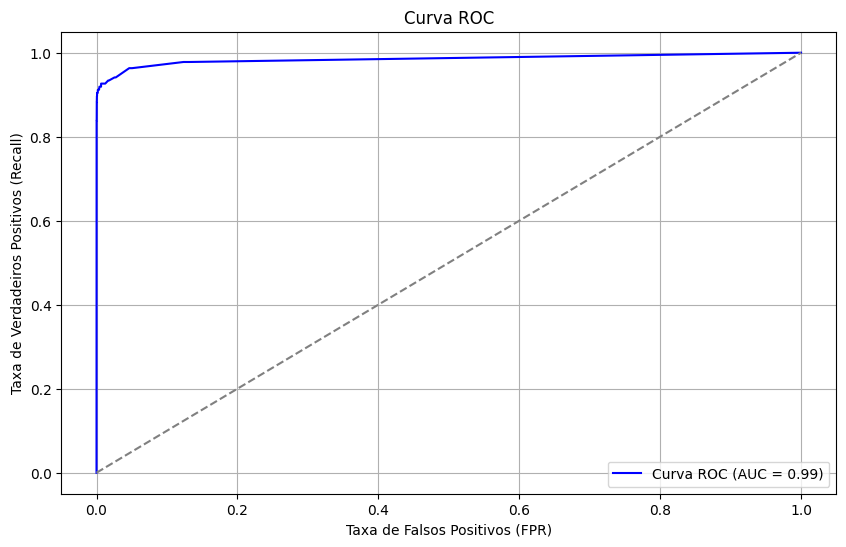

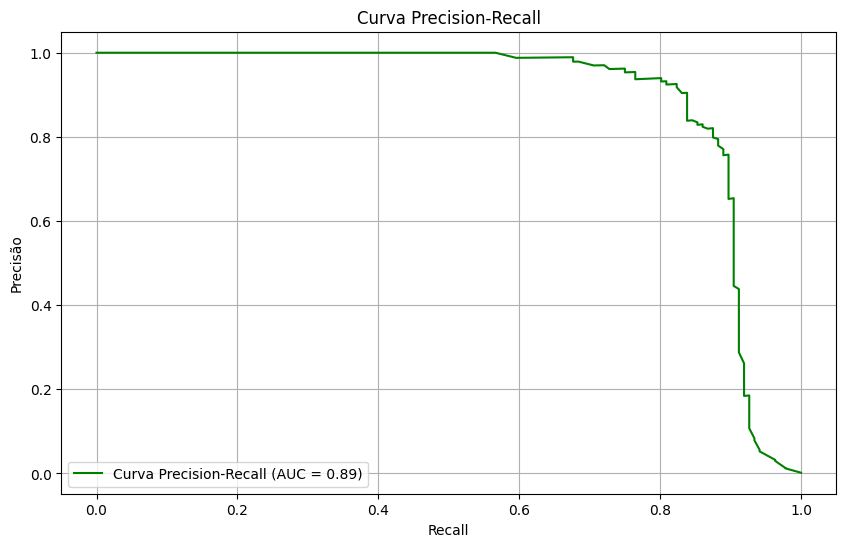

In [12]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='entropy',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid23**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='log_loss',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid24**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='log_loss',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid25**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='gini',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid26**

----------------------

----------------------

Acurácia: 0.9994
Acurácia Balanceada: 0.9336
Precisão: 0.7867
Revocação: 0.8676
F1 Score: 0.8252
ROC AUC: 0.9827
PR AUC: 0.8617

Matriz de Confusão:
 [[85275    32]
 [   18   118]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.79      0.87      0.83       136

    accuracy                           1.00     85443
   macro avg       0.89      0.93      0.91     85443
weighted avg       1.00      1.00      1.00     85443



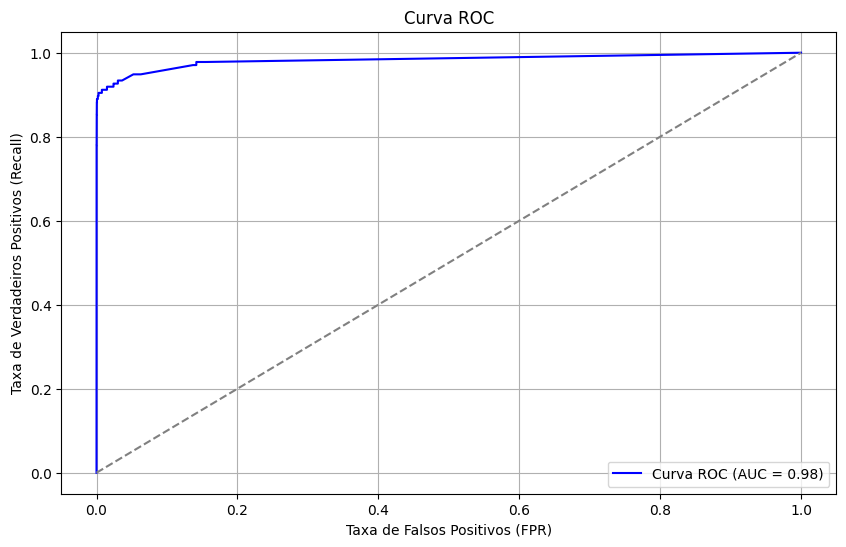

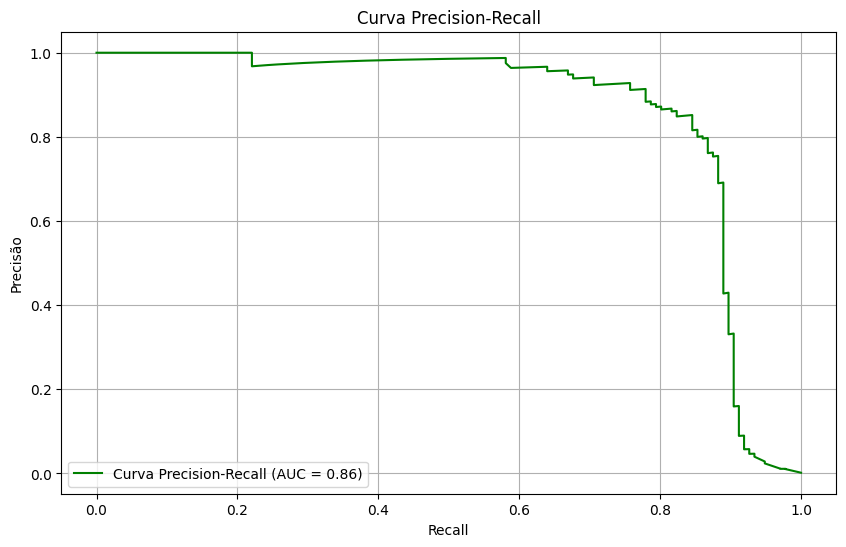

In [16]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='gini',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid27**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='entropy',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid28**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='entropy',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid29**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='log_loss',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid30**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='log_loss',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid31**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9337
Precisão: 0.8252
Revocação: 0.8676
F1 Score: 0.8459
ROC AUC: 0.9871
PR AUC: 0.8767

Matriz de Confusão:
 [[85282    25]
 [   18   118]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.87      0.85       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



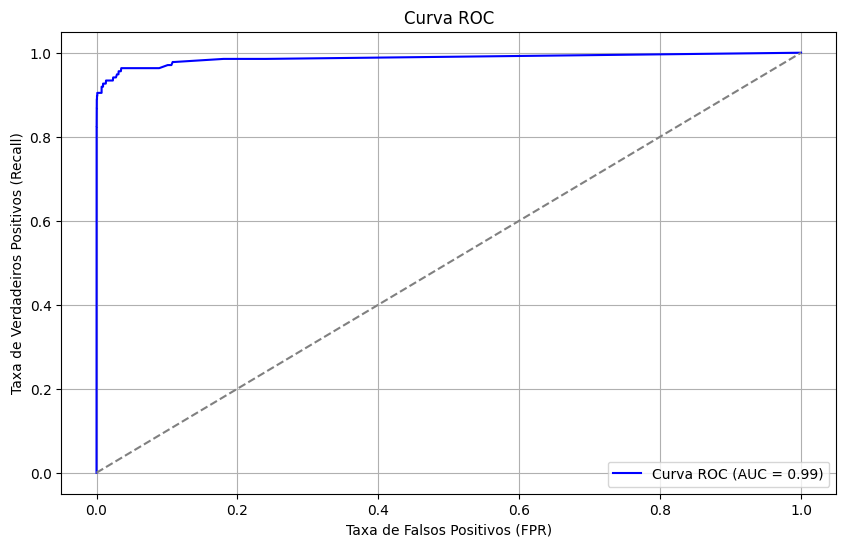

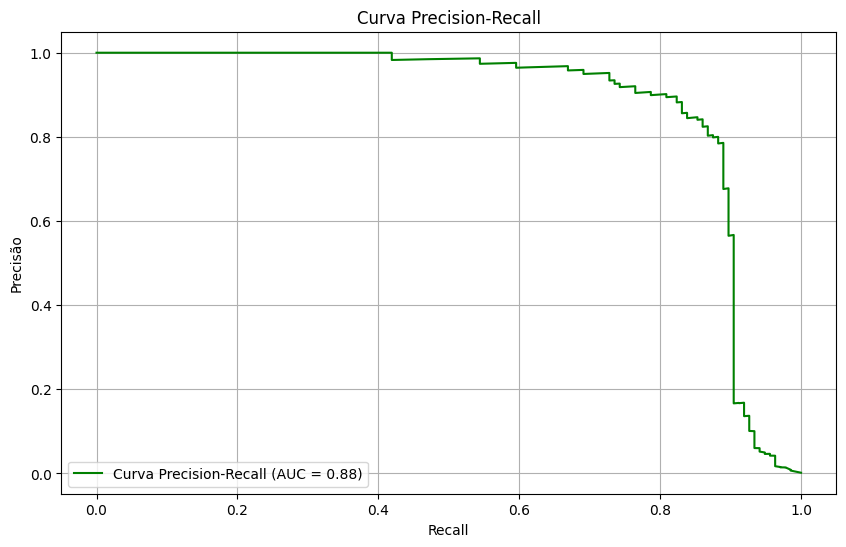

In [21]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='gini',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid32**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9337
Precisão: 0.8194
Revocação: 0.8676
F1 Score: 0.8429
ROC AUC: 0.9884
PR AUC: 0.8764

Matriz de Confusão:
 [[85281    26]
 [   18   118]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.87      0.84       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



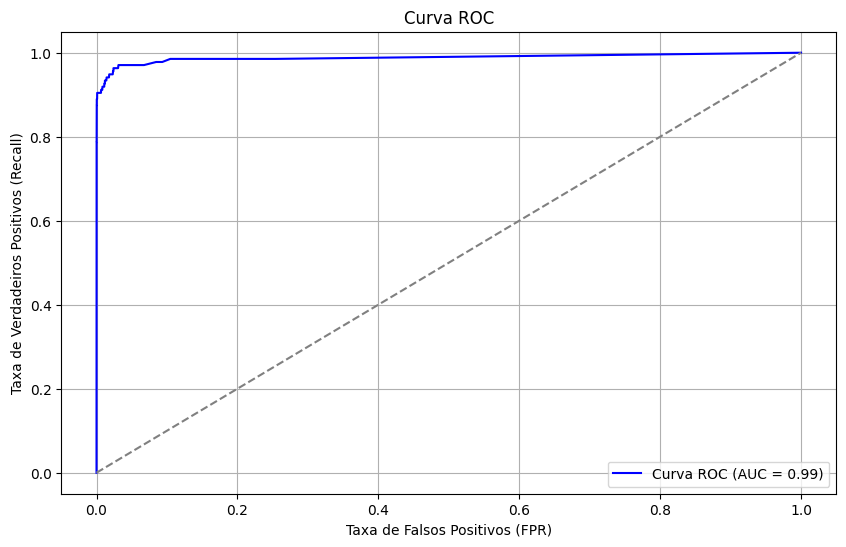

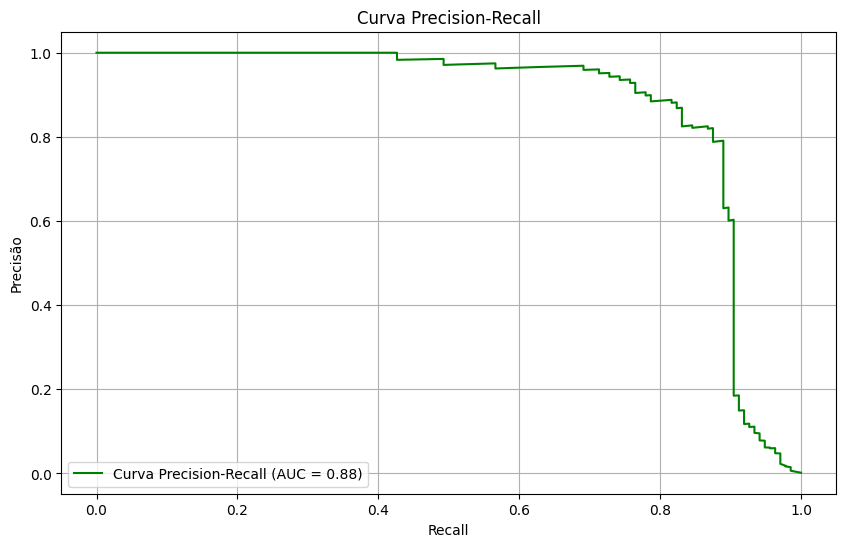

In [22]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, n_neighbors=5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5,
                                  min_samples_leaf=2, criterion='gini',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()